# League of legend Winner team predict to Using Riot API

2019 데이터분석 개인 프로젝트 리메이크

리그 오브 레전드 경기 기록을 수집하고, 가공하여 승률에 영향을 주는 요인 분석과 실시간 스코어 변동에 따른 승률 예측 프로젝트

A project to collect league-of-legend game records to analyze the factors that affect victory and to predict winning rates based on real-time score fluctuations.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/lol-classic-rank-game-datakrtop-3-tier/lose_team_stats.csv
/kaggle/input/lol-classic-rank-game-datakrtop-3-tier/match_winner_data.pkl
/kaggle/input/lol-classic-rank-game-datakrtop-3-tier/match_ver1.pkl
/kaggle/input/lol-classic-rank-game-datakrtop-3-tier/matchpre.pkl
/kaggle/input/lol-classic-rank-game-datakrtop-3-tier/win_team_stats.csv
/kaggle/input/lol-classic-rank-game-datakrtop-3-tier/match_lose_data.pkl
/kaggle/input/lol-classic-rank-game-datakrtop-3-tier/stats.csv
/kaggle/input/lol-classic-rank-game-datakrtop-3-tier/lol_version_Date.csv


# 2. Data Preprocessing / 데이터 전처리

## 라이브러리 로드 & 데이터 로드

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import gc
from tqdm import tqdm_notebook # 오래 걸리는 작업 진행확인용

In [3]:
import warnings
warnings.filterwarnings(action='ignore')

In [4]:
pd.options.display.max_columns = 60

In [5]:
match = pd.read_pickle("/kaggle/input/lol-classic-rank-game-datakrtop-3-tier/matchpre.pkl")

win_team_stat = pd.read_csv("/kaggle/input/lol-classic-rank-game-datakrtop-3-tier/win_team_stats.csv")

lose_team_stat = pd.read_csv("/kaggle/input/lol-classic-rank-game-datakrtop-3-tier/lose_team_stats.csv")

win_team = pd.read_pickle("/kaggle/input/lol-classic-rank-game-datakrtop-3-tier/match_winner_data.pkl")

lose_team = pd.read_pickle("/kaggle/input/lol-classic-rank-game-datakrtop-3-tier/match_lose_data.pkl")

date = pd.read_csv("/kaggle/input/lol-classic-rank-game-datakrtop-3-tier/lol_version_Date.csv")

In [6]:
display(match,win_team,lose_team,win_team_stat,lose_team_stat)

,gameDuration,gameId,gameVersion,participants
0,1323.0,4.247263e+09,1063144405,"[{'participantId': 1, 'teamId': 100, 'champion..."
1,1317.0,4.247156e+09,1063144405,"[{'participantId': 1, 'teamId': 100, 'champion..."
2,932.0,4.243963e+09,1063138894,"[{'participantId': 1, 'teamId': 100, 'champion..."
3,2098.0,4.241678e+09,1063138894,"[{'participantId': 1, 'teamId': 100, 'champion..."
4,2344.0,4.241539e+09,1063138894,"[{'participantId': 1, 'teamId': 100, 'champion..."
...,...,...,...,...
0,934.0,4.039738e+09,9243006382,"[{'participantId': 1, 'teamId': 100, 'champion..."
0,1418.0,4.170286e+09,1043089400,"[{'participantId': 1, 'teamId': 100, 'champion..."
0,933.0,4.136207e+09,1033071028,"[{'participantId': 1, 'teamId': 100, 'champion..."
0,1544.0,4.130964e+09,1023054739,"[{'participantId': 1, 'teamId': 100, 'champion..."


,gameId,teamId,win,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,towerKills,inhibitorKills,baronKills,dragonKills,vilemawKills,riftHeraldKills,dominionVictoryScore,bans
0,4.247263e+09,200,Win,False,True,True,False,True,True,9,1,0,3,0,2,0,"[{'championId': 523, 'pickTurn': 6}, {'champio..."
1,4.247156e+09,100,Win,False,False,False,False,True,True,4,0,0,2,0,2,0,"[{'championId': 523, 'pickTurn': 1}, {'champio..."
2,4.243963e+09,200,Win,True,True,True,False,True,True,5,1,0,2,0,2,0,"[{'championId': 350, 'pickTurn': 6}, {'champio..."
3,4.241678e+09,200,Win,True,True,False,False,False,True,6,0,1,3,0,1,0,"[{'championId': 81, 'pickTurn': 6}, {'champion..."
4,4.241539e+09,100,Win,True,True,True,True,True,True,11,3,2,2,0,2,0,"[{'championId': 30, 'pickTurn': 1}, {'champion..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92924,4.039738e+09,200,Win,True,True,False,False,True,True,2,0,0,1,0,1,0,"[{'championId': 84, 'pickTurn': 6}, {'champion..."
92925,4.170286e+09,100,Win,True,False,True,True,False,True,11,3,1,2,0,2,0,"[{'championId': 875, 'pickTurn': 1}, {'champio..."
92926,4.136207e+09,100,Win,True,True,True,False,True,True,5,1,0,1,0,1,0,"[{'championId': 60, 'pickTurn': 1}, {'champion..."
92927,4.130964e+09,100,Win,True,False,False,True,False,False,5,0,1,2,0,0,0,"[{'championId': 89, 'pickTurn': 1}, {'champion..."


,gameId,teamId,win,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,towerKills,inhibitorKills,baronKills,dragonKills,vilemawKills,riftHeraldKills,dominionVictoryScore,bans
0,4.247263e+09,100,Fail,True,False,False,False,False,False,0,0,0,0,0,0,0,"[{'championId': -1, 'pickTurn': 1}, {'champion..."
1,4.247156e+09,200,Fail,True,True,False,False,False,False,2,0,0,0,0,0,0,"[{'championId': 875, 'pickTurn': 6}, {'champio..."
2,4.243963e+09,100,Fail,False,False,False,False,False,False,0,0,0,0,0,0,0,"[{'championId': 110, 'pickTurn': 1}, {'champio..."
3,4.241678e+09,100,Fail,False,False,False,True,True,False,2,0,1,1,0,0,0,"[{'championId': 523, 'pickTurn': 1}, {'champio..."
4,4.241539e+09,200,Fail,False,False,False,False,False,False,6,1,1,3,0,0,0,"[{'championId': 523, 'pickTurn': 6}, {'champio..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92924,4.039738e+09,100,Fail,False,False,False,False,False,False,0,0,0,0,0,0,0,"[{'championId': 523, 'pickTurn': 1}, {'champio..."
92925,4.170286e+09,200,Fail,False,True,False,False,True,False,1,0,0,1,0,0,0,"[{'championId': 157, 'pickTurn': 6}, {'champio..."
92926,4.136207e+09,200,Fail,False,False,False,False,False,False,0,0,0,0,0,0,0,"[{'championId': 523, 'pickTurn': 6}, {'champio..."
92927,4.130964e+09,200,Fail,False,True,False,False,True,True,3,0,0,2,0,2,0,"[{'championId': 84, 'pickTurn': 6}, {'champion..."


,win_kills1,win_kills2,win_kills3,win_kills4,win_kills5,win_deaths1,win_deaths2,win_deaths3,win_deaths4,win_deaths5,win_totalDamageDealtToChampions1,win_totalDamageDealtToChampions2,win_totalDamageDealtToChampions3,win_totalDamageDealtToChampions4,win_totalDamageDealtToChampions5,win_goldEarned1,win_goldEarned2,win_goldEarned3,win_goldEarned4,win_goldEarned5,win_visionScore1,win_visionScore2,win_visionScore3,win_visionScore4,win_visionScore5,win_totalTimeCrowdControlDealt1,win_totalTimeCrowdControlDealt2,win_totalTimeCrowdControlDealt3,win_totalTimeCrowdControlDealt4,win_totalTimeCrowdControlDealt5,gameId
0,10.0,4.0,4.0,6.0,7.0,4.0,1.0,4.0,4.0,2.0,17898.0,15800.0,10786.0,16964.0,11568.0,9802.0,9203.0,11127.0,9286.0,10414.0,28.0,16.0,23.0,17.0,36.0,183.0,92.0,231.0,54.0,281.0,4.247263e+09
1,3.0,7.0,0.0,7.0,2.0,5.0,0.0,0.0,0.0,3.0,16662.0,11674.0,7498.0,13016.0,11393.0,8452.0,9069.0,6023.0,9868.0,7660.0,14.0,27.0,46.0,16.0,22.0,33.0,291.0,31.0,235.0,407.0,4.247156e+09
2,7.0,3.0,5.0,9.0,4.0,5.0,1.0,2.0,1.0,2.0,16241.0,7572.0,10024.0,15115.0,12395.0,9029.0,6921.0,8331.0,11860.0,8589.0,11.0,35.0,25.0,15.0,21.0,178.0,82.0,371.0,140.0,122.0,4.255795e+09
3,11.0,4.0,7.0,2.0,3.0,2.0,2.0,2.0,3.0,4.0,12111.0,5510.0,8440.0,5373.0,11038.0,10175.0,5552.0,7439.0,5873.0,7033.0,17.0,25.0,17.0,9.0,19.0,134.0,61.0,332.0,274.0,163.0,4.255762e+09
4,0.0,4.0,2.0,11.0,8.0,1.0,4.0,4.0,3.0,4.0,10900.0,11362.0,14494.0,27391.0,22399.0,7217.0,10497.0,10323.0,13499.0,12720.0,42.0,38.0,30.0,18.0,26.0,69.0,503.0,562.0,79.0,69.0,4.255663e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90495,9.0,7.0,5.0,2.0,3.0,4.0,2.0,3.0,5.0,3.0,14155.0,10456.0,7457.0,6063.0,11818.0,11504.0,11665.0,9386.0,6300.0,8800.0,18.0,23.0,22.0,37.0,13.0,56.0,83.0,677.0,72.0,409.0,3.499125e+09
90496,4.0,15.0,7.0,2.0,6.0,3.0,0.0,5.0,5.0,3.0,18498.0,28764.0,18381.0,6443.0,18967.0,11600.0,16353.0,11348.0,9029.0,11323.0,44.0,20.0,17.0,58.0,32.0,117.0,180.0,323.0,179.0,315.0,3.503846e+09
90497,1.0,2.0,3.0,4.0,6.0,5.0,4.0,2.0,0.0,4.0,3216.0,9301.0,14199.0,9407.0,12147.0,7530.0,8829.0,10681.0,9829.0,9609.0,42.0,21.0,25.0,21.0,27.0,50.0,79.0,2695.0,16.0,135.0,3.495459e+09
90498,1.0,8.0,8.0,8.0,12.0,9.0,6.0,5.0,7.0,7.0,7732.0,24452.0,22275.0,21552.0,22808.0,8324.0,14188.0,13153.0,12721.0,14489.0,49.0,18.0,27.0,29.0,21.0,731.0,135.0,201.0,197.0,834.0,3.499130e+09


,lose_kills1,lose_kills2,lose_kills3,lose_kills4,lose_kills5,lose_deaths1,lose_deaths2,lose_deaths3,lose_deaths4,lose_deaths5,lose_totalDamageDealtToChampions1,lose_totalDamageDealtToChampions2,lose_totalDamageDealtToChampions3,lose_totalDamageDealtToChampions4,lose_totalDamageDealtToChampions5,lose_goldEarned1,lose_goldEarned2,lose_goldEarned3,lose_goldEarned4,lose_goldEarned5,lose_visionScore1,lose_visionScore2,lose_visionScore3,lose_visionScore4,lose_visionScore5,lose_totalTimeCrowdControlDealt1,lose_totalTimeCrowdControlDealt2,lose_totalTimeCrowdControlDealt3,lose_totalTimeCrowdControlDealt4,lose_totalTimeCrowdControlDealt5,gameId
0,3.0,0.0,4.0,4.0,4.0,6.0,6.0,5.0,7.0,7.0,10844.0,7095.0,13458.0,9670.0,14972.0,6844.0,5205.0,8226.0,7911.0,8815.0,14.0,34.0,8.0,21.0,14.0,19.0,38.0,173.0,305.0,237.0,4.247263e+09
1,0.0,2.0,3.0,3.0,0.0,4.0,6.0,3.0,4.0,2.0,4618.0,14837.0,9197.0,10035.0,5531.0,4524.0,8823.0,7788.0,9008.0,6993.0,30.0,16.0,27.0,28.0,10.0,80.0,67.0,491.0,50.0,0.0,4.247156e+09
2,3.0,5.0,1.0,1.0,1.0,7.0,4.0,7.0,5.0,5.0,7096.0,17030.0,8735.0,7849.0,5815.0,6551.0,7562.0,5346.0,5004.0,5931.0,14.0,13.0,40.0,15.0,9.0,133.0,249.0,135.0,125.0,226.0,4.255795e+09
3,1.0,6.0,2.0,1.0,3.0,6.0,3.0,7.0,4.0,7.0,9492.0,8557.0,6679.0,4058.0,6912.0,5442.0,7846.0,5092.0,3931.0,5071.0,1.0,27.0,9.0,26.0,5.0,71.0,476.0,13.0,52.0,88.0,4.255762e+09
4,4.0,2.0,4.0,1.0,5.0,7.0,6.0,1.0,7.0,4.0,9686.0,14045.0,24086.0,2959.0,16719.0,7928.0,8042.0,12502.0,6185.0,10729.0,25.0,10.0,29.0,65.0,28.0,422.0,151.0,161.0,63.0,97.0,4.255663e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90495,5.0,7.0,2.0,3.0,0.0,2.0,8.0,4.0,7.0,5.0,8167.0,8541.0,3254.0,7906.0,6872.0,7979.0,9620.0,5942.0,6820.0,6134.0,12.0,21.0,22.0,18.0,10.0,67.0,155.0,56.0,553.0,124.0,3.499125e+09
90496,4.0,1.0,5.0,2.0,4.0,8.0,5.0,6.0,5.0,10.0,6319.0,14100.0,16182.0,12772.0,12664.0,7962.0,8291.0,12046.0,8564.0,8811.0,70.0,30.0,14.0,19.0,27.0,127.0,1454.0,540.0,48.0,555.0,3.503846e+09
90497,4.0,2.0,6.0,1.0,2.0,3.0,3.0,2.0,5.0,3.0,11678.0,4682.0,11694.0,6163.0,9521.0,8879.0,5249.0,9415.0,7845.0,9325.0,26.0,51.0,17.0,14.0,21.0,622.0,80.0,536.0,0.0,112.0,3.495459e+09
90498,7.0,7.0,6.0,5.0,9.0,8.0,6.0,9.0,8.0,6.0,16953.0,11149.0,22181.0,13205.0,18448.0,11375.0,11133.0,12146.0,10025.0,11755.0,28.0,23.0,22.0,72.0,25.0,296.0,285.0,822.0,139.0,657.0,3.499130e+09


In [7]:
"""
Win, lose team 구분 확인
"""
for i in tqdm_notebook(range(len(win_team))):
    wf_valid = win_team['win'].iloc[i]
    
    if lose_team['win'].iloc[i] != wf_valid:
        pass
    else:
        print(str(i)+'데이터 정합성 문제')

In [8]:
"""
팀 스탯 row 와 팀 기록 row 일치시키기
"""
gameId = win_team_stat["gameId"]
match = pd.merge(gameId,match,how="inner",on="gameId")
win_team = pd.merge(gameId,win_team,how="inner",on="gameId")
lose_team = pd.merge(gameId,lose_team,how="inner",on="gameId")


In [9]:
display(match.shape,win_team.shape,lose_team.shape,win_team_stat.shape,lose_team_stat.shape)

(90572, 4)

(90716, 17)

(90716, 17)

(90500, 31)

(90500, 31)

90500개 이상이 남았다는 것은 게임 데이터 중복이 있다는 것이다.

In [10]:
"""
duplicated() 함수는 리스트에 대한 중복검사를 지원하지 않으므로 리스트 칼럼 삭제
"""
match.drop("participants",axis=1,inplace=True)

win_team.drop("bans",axis=1,inplace=True)

lose_team.drop("bans",axis=1,inplace=True)

In [11]:
display(match.shape,win_team.shape,lose_team.shape,win_team_stat.shape,lose_team_stat.shape)

(90572, 3)

(90716, 16)

(90716, 16)

(90500, 31)

(90500, 31)

In [12]:
display(match.duplicated().sum(),win_team.duplicated().sum(),lose_team.duplicated().sum())

108

252

252

In [13]:
display(win_team_stat.duplicated().sum(),lose_team_stat.duplicated().sum())

36

36

In [14]:
match = match.drop_duplicates()
win_team = win_team.drop_duplicates()
lose_team = lose_team.drop_duplicates()

win_team_stat = win_team_stat.drop_duplicates()
lose_team_stat = lose_team_stat.drop_duplicates()

In [15]:
display(match.shape,win_team.shape,lose_team.shape,win_team_stat.shape,lose_team_stat.shape)

(90464, 3)

(90464, 16)

(90464, 16)

(90464, 31)

(90464, 31)

In [16]:
"""
win_team, lose_team으로 나누어 모든 테이블 병합
"""
win_team = pd.merge(match,win_team,how="left",on="gameId")
win_team = pd.merge(win_team,win_team_stat,how="left",on="gameId")

lose_team = pd.merge(match,lose_team,how="left",on="gameId")
lose_team = pd.merge(lose_team,lose_team_stat,how="left",on="gameId")
display(win_team,lose_team)

,gameId,gameDuration,gameVersion,teamId,win,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,towerKills,inhibitorKills,baronKills,dragonKills,vilemawKills,riftHeraldKills,dominionVictoryScore,win_kills1,win_kills2,win_kills3,win_kills4,win_kills5,win_deaths1,win_deaths2,win_deaths3,win_deaths4,win_deaths5,win_totalDamageDealtToChampions1,win_totalDamageDealtToChampions2,win_totalDamageDealtToChampions3,win_totalDamageDealtToChampions4,win_totalDamageDealtToChampions5,win_goldEarned1,win_goldEarned2,win_goldEarned3,win_goldEarned4,win_goldEarned5,win_visionScore1,win_visionScore2,win_visionScore3,win_visionScore4,win_visionScore5,win_totalTimeCrowdControlDealt1,win_totalTimeCrowdControlDealt2,win_totalTimeCrowdControlDealt3,win_totalTimeCrowdControlDealt4,win_totalTimeCrowdControlDealt5
0,4.247263e+09,1323.0,1063144405,200,Win,False,True,True,False,True,True,9,1,0,3,0,2,0,10.0,4.0,4.0,6.0,7.0,4.0,1.0,4.0,4.0,2.0,17898.0,15800.0,10786.0,16964.0,11568.0,9802.0,9203.0,11127.0,9286.0,10414.0,28.0,16.0,23.0,17.0,36.0,183.0,92.0,231.0,54.0,281.0
1,4.247156e+09,1317.0,1063144405,100,Win,False,False,False,False,True,True,4,0,0,2,0,2,0,3.0,7.0,0.0,7.0,2.0,5.0,0.0,0.0,0.0,3.0,16662.0,11674.0,7498.0,13016.0,11393.0,8452.0,9069.0,6023.0,9868.0,7660.0,14.0,27.0,46.0,16.0,22.0,33.0,291.0,31.0,235.0,407.0
2,4.255795e+09,1244.0,1063144405,200,Win,True,True,True,False,True,False,6,1,0,3,0,1,0,7.0,3.0,5.0,9.0,4.0,5.0,1.0,2.0,1.0,2.0,16241.0,7572.0,10024.0,15115.0,12395.0,9029.0,6921.0,8331.0,11860.0,8589.0,11.0,35.0,25.0,15.0,21.0,178.0,82.0,371.0,140.0,122.0
3,4.255762e+09,962.0,1063144405,200,Win,False,True,False,False,True,True,3,0,0,1,0,1,0,11.0,4.0,7.0,2.0,3.0,2.0,2.0,2.0,3.0,4.0,12111.0,5510.0,8440.0,5373.0,11038.0,10175.0,5552.0,7439.0,5873.0,7033.0,17.0,25.0,17.0,9.0,19.0,134.0,61.0,332.0,274.0,163.0
4,4.255663e+09,1632.0,1063144405,200,Win,True,True,True,True,False,False,9,2,1,2,0,0,0,0.0,4.0,2.0,11.0,8.0,1.0,4.0,4.0,3.0,4.0,10900.0,11362.0,14494.0,27391.0,22399.0,7217.0,10497.0,10323.0,13499.0,12720.0,42.0,38.0,30.0,18.0,26.0,69.0,503.0,562.0,79.0,69.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90459,3.499125e+09,1179.0,912577563,100,Win,True,True,True,False,True,True,11,3,0,1,0,1,0,9.0,7.0,5.0,2.0,3.0,4.0,2.0,3.0,5.0,3.0,14155.0,10456.0,7457.0,6063.0,11818.0,11504.0,11665.0,9386.0,6300.0,8800.0,18.0,23.0,22.0,37.0,13.0,56.0,83.0,677.0,72.0,409.0
90460,3.503846e+09,1684.0,912577563,200,Win,True,True,True,False,False,True,9,3,0,1,0,1,0,4.0,15.0,7.0,2.0,6.0,3.0,0.0,5.0,5.0,3.0,18498.0,28764.0,18381.0,6443.0,18967.0,11600.0,16353.0,11348.0,9029.0,11323.0,44.0,20.0,17.0,58.0,32.0,117.0,180.0,323.0,179.0,315.0
90461,3.495459e+09,1464.0,912577563,200,Win,False,False,False,True,True,False,4,0,1,3,0,0,0,1.0,2.0,3.0,4.0,6.0,5.0,4.0,2.0,0.0,4.0,3216.0,9301.0,14199.0,9407.0,12147.0,7530.0,8829.0,10681.0,9829.0,9609.0,42.0,21.0,25.0,21.0,27.0,50.0,79.0,2695.0,16.0,135.0
90462,3.499130e+09,1694.0,912577563,100,Win,False,False,True,True,False,False,7,2,1,2,0,0,0,1.0,8.0,8.0,8.0,12.0,9.0,6.0,5.0,7.0,7.0,7732.0,24452.0,22275.0,21552.0,22808.0,8324.0,14188.0,13153.0,12721.0,14489.0,49.0,18.0,27.0,29.0,21.0,731.0,135.0,201.0,197.0,834.0


,gameId,gameDuration,gameVersion,teamId,win,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,towerKills,inhibitorKills,baronKills,dragonKills,vilemawKills,riftHeraldKills,dominionVictoryScore,lose_kills1,lose_kills2,lose_kills3,lose_kills4,lose_kills5,lose_deaths1,lose_deaths2,lose_deaths3,lose_deaths4,lose_deaths5,lose_totalDamageDealtToChampions1,lose_totalDamageDealtToChampions2,lose_totalDamageDealtToChampions3,lose_totalDamageDealtToChampions4,lose_totalDamageDealtToChampions5,lose_goldEarned1,lose_goldEarned2,lose_goldEarned3,lose_goldEarned4,lose_goldEarned5,lose_visionScore1,lose_visionScore2,lose_visionScore3,lose_visionScore4,lose_visionScore5,lose_totalTimeCrowdControlDealt1,lose_totalTimeCrowdControlDealt2,lose_totalTimeCrowdControlDealt3,lose_totalTimeCrowdControlDealt4,lose_totalTimeCrowdControlDealt5
0,4.247263e+09,1323.0,1063144405,100,Fail,True,False,False,False,False,False,0,0,0,0,0,0,0,3.0,0.0,4.0,4.0,4.0,6.0,6.0,5.0,7.0,7.0,10844.0,7095.0,13458.0,9670.0,14972.0,6844.0,5205.0,8226.0,7911.0,8815.0,14.0,34.0,8.0,21.0,14.0,19.0,38.0,173.0,305.0,237.0
1,4.247156e+09,1317.0,1063144405,200,Fail,True,True,False,False,False,False,2,0,0,0,0,0,0,0.0,2.0,3.0,3.0,0.0,4.0,6.0,3.0,4.0,2.0,4618.0,14837.0,9197.0,10035.0,5531.0,4524.0,8823.0,7788.0,9008.0,6993.0,30.0,16.0,27.0,28.0,10.0,80.0,67.0,491.0,50.0,0.0
2,4.255795e+09,1244.0,1063144405,100,Fail,False,False,False,False,False,True,0,0,0,0,0,1,0,3.0,5.0,1.0,1.0,1.0,7.0,4.0,7.0,5.0,5.0,7096.0,17030.0,8735.0,7849.0,5815.0,6551.0,7562.0,5346.0,5004.0,5931.0,14.0,13.0,40.0,15.0,9.0,133.0,249.0,135.0,125.0,226.0
3,4.255762e+09,962.0,1063144405,100,Fail,True,False,False,False,False,False,0,0,0,0,0,0,0,1.0,6.0,2.0,1.0,3.0,6.0,3.0,7.0,4.0,7.0,9492.0,8557.0,6679.0,4058.0,6912.0,5442.0,7846.0,5092.0,3931.0,5071.0,1.0,27.0,9.0,26.0,5.0,71.0,476.0,13.0,52.0,88.0
4,4.255663e+09,1632.0,1063144405,100,Fail,False,False,False,False,True,True,3,0,0,1,0,1,0,4.0,2.0,4.0,1.0,5.0,7.0,6.0,1.0,7.0,4.0,9686.0,14045.0,24086.0,2959.0,16719.0,7928.0,8042.0,12502.0,6185.0,10729.0,25.0,10.0,29.0,65.0,28.0,422.0,151.0,161.0,63.0,97.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90459,3.499125e+09,1179.0,912577563,200,Fail,False,False,False,False,False,False,1,0,0,0,0,0,0,5.0,7.0,2.0,3.0,0.0,2.0,8.0,4.0,7.0,5.0,8167.0,8541.0,3254.0,7906.0,6872.0,7979.0,9620.0,5942.0,6820.0,6134.0,12.0,21.0,22.0,18.0,10.0,67.0,155.0,56.0,553.0,124.0
90460,3.503846e+09,1684.0,912577563,100,Fail,False,False,False,False,True,False,0,0,0,1,0,0,0,4.0,1.0,5.0,2.0,4.0,8.0,5.0,6.0,5.0,10.0,6319.0,14100.0,16182.0,12772.0,12664.0,7962.0,8291.0,12046.0,8564.0,8811.0,70.0,30.0,14.0,19.0,27.0,127.0,1454.0,540.0,48.0,555.0
90461,3.495459e+09,1464.0,912577563,100,Fail,True,True,False,False,False,True,2,0,0,0,0,1,0,4.0,2.0,6.0,1.0,2.0,3.0,3.0,2.0,5.0,3.0,11678.0,4682.0,11694.0,6163.0,9521.0,8879.0,5249.0,9415.0,7845.0,9325.0,26.0,51.0,17.0,14.0,21.0,622.0,80.0,536.0,0.0,112.0
90462,3.499130e+09,1694.0,912577563,200,Fail,True,True,False,False,True,True,4,0,0,2,0,1,0,7.0,7.0,6.0,5.0,9.0,8.0,6.0,9.0,8.0,6.0,16953.0,11149.0,22181.0,13205.0,18448.0,11375.0,11133.0,12146.0,10025.0,11755.0,28.0,23.0,22.0,72.0,25.0,296.0,285.0,822.0,139.0,657.0


In [17]:
del match
gc.collect()

3

In [18]:
"""
팀 데이터셋을 전체 데이터로 병합하기 전에 칼럼명 일치시키기
"""
win_team.columns = win_team.columns.str.replace("win_","")

lose_team.columns = lose_team.columns.str.replace("lose_","")

In [19]:
"""
전체 게임 정보 gamedata 테이블 생성
"""
gamedata = pd.concat([win_team,lose_team])
gamedata = gamedata.reset_index()
gamedata.drop("index",axis=1,inplace=True)
gamedata = gamedata.astype({"gameVersion":int})
gamedata = pd.merge(gamedata,date,how="inner",on="gameVersion")

In [20]:
del win_team
del lose_team
gc.collect()

18

In [21]:
gamedata

,gameId,gameDuration,gameVersion,teamId,win,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,towerKills,inhibitorKills,baronKills,dragonKills,vilemawKills,riftHeraldKills,dominionVictoryScore,kills1,kills2,kills3,kills4,kills5,deaths1,deaths2,deaths3,deaths4,deaths5,totalDamageDealtToChampions1,totalDamageDealtToChampions2,totalDamageDealtToChampions3,totalDamageDealtToChampions4,totalDamageDealtToChampions5,goldEarned1,goldEarned2,goldEarned3,goldEarned4,goldEarned5,visionScore1,visionScore2,visionScore3,visionScore4,visionScore5,totalTimeCrowdControlDealt1,totalTimeCrowdControlDealt2,totalTimeCrowdControlDealt3,totalTimeCrowdControlDealt4,totalTimeCrowdControlDealt5,date
0,4.247263e+09,1323.0,1063144405,200,Win,False,True,True,False,True,True,9,1,0,3,0,2,0,10.0,4.0,4.0,6.0,7.0,4.0,1.0,4.0,4.0,2.0,17898.0,15800.0,10786.0,16964.0,11568.0,9802.0,9203.0,11127.0,9286.0,10414.0,28.0,16.0,23.0,17.0,36.0,183.0,92.0,231.0,54.0,281.0,2020-03-25
1,4.247156e+09,1317.0,1063144405,100,Win,False,False,False,False,True,True,4,0,0,2,0,2,0,3.0,7.0,0.0,7.0,2.0,5.0,0.0,0.0,0.0,3.0,16662.0,11674.0,7498.0,13016.0,11393.0,8452.0,9069.0,6023.0,9868.0,7660.0,14.0,27.0,46.0,16.0,22.0,33.0,291.0,31.0,235.0,407.0,2020-03-25
2,4.255795e+09,1244.0,1063144405,200,Win,True,True,True,False,True,False,6,1,0,3,0,1,0,7.0,3.0,5.0,9.0,4.0,5.0,1.0,2.0,1.0,2.0,16241.0,7572.0,10024.0,15115.0,12395.0,9029.0,6921.0,8331.0,11860.0,8589.0,11.0,35.0,25.0,15.0,21.0,178.0,82.0,371.0,140.0,122.0,2020-03-25
3,4.255762e+09,962.0,1063144405,200,Win,False,True,False,False,True,True,3,0,0,1,0,1,0,11.0,4.0,7.0,2.0,3.0,2.0,2.0,2.0,3.0,4.0,12111.0,5510.0,8440.0,5373.0,11038.0,10175.0,5552.0,7439.0,5873.0,7033.0,17.0,25.0,17.0,9.0,19.0,134.0,61.0,332.0,274.0,163.0,2020-03-25
4,4.255663e+09,1632.0,1063144405,200,Win,True,True,True,True,False,False,9,2,1,2,0,0,0,0.0,4.0,2.0,11.0,8.0,1.0,4.0,4.0,3.0,4.0,10900.0,11362.0,14494.0,27391.0,22399.0,7217.0,10497.0,10323.0,13499.0,12720.0,42.0,38.0,30.0,18.0,26.0,69.0,503.0,562.0,79.0,69.0,2020-03-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180923,3.499125e+09,1179.0,912577563,200,Fail,False,False,False,False,False,False,1,0,0,0,0,0,0,5.0,7.0,2.0,3.0,0.0,2.0,8.0,4.0,7.0,5.0,8167.0,8541.0,3254.0,7906.0,6872.0,7979.0,9620.0,5942.0,6820.0,6134.0,12.0,21.0,22.0,18.0,10.0,67.0,155.0,56.0,553.0,124.0,2018-12-15
180924,3.503846e+09,1684.0,912577563,100,Fail,False,False,False,False,True,False,0,0,0,1,0,0,0,4.0,1.0,5.0,2.0,4.0,8.0,5.0,6.0,5.0,10.0,6319.0,14100.0,16182.0,12772.0,12664.0,7962.0,8291.0,12046.0,8564.0,8811.0,70.0,30.0,14.0,19.0,27.0,127.0,1454.0,540.0,48.0,555.0,2018-12-15
180925,3.495459e+09,1464.0,912577563,100,Fail,True,True,False,False,False,True,2,0,0,0,0,1,0,4.0,2.0,6.0,1.0,2.0,3.0,3.0,2.0,5.0,3.0,11678.0,4682.0,11694.0,6163.0,9521.0,8879.0,5249.0,9415.0,7845.0,9325.0,26.0,51.0,17.0,14.0,21.0,622.0,80.0,536.0,0.0,112.0,2018-12-15
180926,3.499130e+09,1694.0,912577563,200,Fail,True,True,False,False,True,True,4,0,0,2,0,1,0,7.0,7.0,6.0,5.0,9.0,8.0,6.0,9.0,8.0,6.0,16953.0,11149.0,22181.0,13205.0,18448.0,11375.0,11133.0,12146.0,10025.0,11755.0,28.0,23.0,22.0,72.0,25.0,296.0,285.0,822.0,139.0,657.0,2018-12-15


In [22]:
"""
카테고리형 데이터(True,False) Label encoding / 분석에 용이하도록 가공
"""
bool_mapping = {True:1,False:0}
bool_col = gamedata.select_dtypes('bool').columns.tolist()

for col in bool_col:
    gamedata[col] = gamedata[col].map(bool_mapping)
    
win_mapping = {"Win":1,"Fail":0}
gamedata["win"] = gamedata["win"].map(win_mapping)

team_mapping = {100:"Blue",200:"Red"}
gamedata["teamId"] = gamedata["teamId"].map(team_mapping)

gamedata["date"] = pd.to_datetime(gamedata["date"])
gamedata["gameId"] = gamedata.astype({"gameId":object})

In [23]:
gamedata

,gameId,gameDuration,gameVersion,teamId,win,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,towerKills,inhibitorKills,baronKills,dragonKills,vilemawKills,riftHeraldKills,dominionVictoryScore,kills1,kills2,kills3,kills4,kills5,deaths1,deaths2,deaths3,deaths4,deaths5,totalDamageDealtToChampions1,totalDamageDealtToChampions2,totalDamageDealtToChampions3,totalDamageDealtToChampions4,totalDamageDealtToChampions5,goldEarned1,goldEarned2,goldEarned3,goldEarned4,goldEarned5,visionScore1,visionScore2,visionScore3,visionScore4,visionScore5,totalTimeCrowdControlDealt1,totalTimeCrowdControlDealt2,totalTimeCrowdControlDealt3,totalTimeCrowdControlDealt4,totalTimeCrowdControlDealt5,date
0,4.24726e+09,1323.0,1063144405,Red,1,0,1,1,0,1,1,9,1,0,3,0,2,0,10.0,4.0,4.0,6.0,7.0,4.0,1.0,4.0,4.0,2.0,17898.0,15800.0,10786.0,16964.0,11568.0,9802.0,9203.0,11127.0,9286.0,10414.0,28.0,16.0,23.0,17.0,36.0,183.0,92.0,231.0,54.0,281.0,2020-03-25
1,4.24716e+09,1317.0,1063144405,Blue,1,0,0,0,0,1,1,4,0,0,2,0,2,0,3.0,7.0,0.0,7.0,2.0,5.0,0.0,0.0,0.0,3.0,16662.0,11674.0,7498.0,13016.0,11393.0,8452.0,9069.0,6023.0,9868.0,7660.0,14.0,27.0,46.0,16.0,22.0,33.0,291.0,31.0,235.0,407.0,2020-03-25
2,4.2558e+09,1244.0,1063144405,Red,1,1,1,1,0,1,0,6,1,0,3,0,1,0,7.0,3.0,5.0,9.0,4.0,5.0,1.0,2.0,1.0,2.0,16241.0,7572.0,10024.0,15115.0,12395.0,9029.0,6921.0,8331.0,11860.0,8589.0,11.0,35.0,25.0,15.0,21.0,178.0,82.0,371.0,140.0,122.0,2020-03-25
3,4.25576e+09,962.0,1063144405,Red,1,0,1,0,0,1,1,3,0,0,1,0,1,0,11.0,4.0,7.0,2.0,3.0,2.0,2.0,2.0,3.0,4.0,12111.0,5510.0,8440.0,5373.0,11038.0,10175.0,5552.0,7439.0,5873.0,7033.0,17.0,25.0,17.0,9.0,19.0,134.0,61.0,332.0,274.0,163.0,2020-03-25
4,4.25566e+09,1632.0,1063144405,Red,1,1,1,1,1,0,0,9,2,1,2,0,0,0,0.0,4.0,2.0,11.0,8.0,1.0,4.0,4.0,3.0,4.0,10900.0,11362.0,14494.0,27391.0,22399.0,7217.0,10497.0,10323.0,13499.0,12720.0,42.0,38.0,30.0,18.0,26.0,69.0,503.0,562.0,79.0,69.0,2020-03-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180923,3.49913e+09,1179.0,912577563,Red,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5.0,7.0,2.0,3.0,0.0,2.0,8.0,4.0,7.0,5.0,8167.0,8541.0,3254.0,7906.0,6872.0,7979.0,9620.0,5942.0,6820.0,6134.0,12.0,21.0,22.0,18.0,10.0,67.0,155.0,56.0,553.0,124.0,2018-12-15
180924,3.50385e+09,1684.0,912577563,Blue,0,0,0,0,0,1,0,0,0,0,1,0,0,0,4.0,1.0,5.0,2.0,4.0,8.0,5.0,6.0,5.0,10.0,6319.0,14100.0,16182.0,12772.0,12664.0,7962.0,8291.0,12046.0,8564.0,8811.0,70.0,30.0,14.0,19.0,27.0,127.0,1454.0,540.0,48.0,555.0,2018-12-15
180925,3.49546e+09,1464.0,912577563,Blue,0,1,1,0,0,0,1,2,0,0,0,0,1,0,4.0,2.0,6.0,1.0,2.0,3.0,3.0,2.0,5.0,3.0,11678.0,4682.0,11694.0,6163.0,9521.0,8879.0,5249.0,9415.0,7845.0,9325.0,26.0,51.0,17.0,14.0,21.0,622.0,80.0,536.0,0.0,112.0,2018-12-15
180926,3.49913e+09,1694.0,912577563,Red,0,1,1,0,0,1,1,4,0,0,2,0,1,0,7.0,7.0,6.0,5.0,9.0,8.0,6.0,9.0,8.0,6.0,16953.0,11149.0,22181.0,13205.0,18448.0,11375.0,11133.0,12146.0,10025.0,11755.0,28.0,23.0,22.0,72.0,25.0,296.0,285.0,822.0,139.0,657.0,2018-12-15


# 3. Data EDA(Exploratory Data Analysis) / 탐색적 데이터 분석

## 데이터 요약

In [24]:
gamedata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180928 entries, 0 to 180927
Data columns (total 49 columns):
gameId                          180928 non-null object
gameDuration                    180928 non-null float64
gameVersion                     180928 non-null int64
teamId                          180928 non-null object
win                             180928 non-null int64
firstBlood                      180928 non-null int64
firstTower                      180928 non-null int64
firstInhibitor                  180928 non-null int64
firstBaron                      180928 non-null int64
firstDragon                     180928 non-null int64
firstRiftHerald                 180928 non-null int64
towerKills                      180928 non-null int64
inhibitorKills                  180928 non-null int64
baronKills                      180928 non-null int64
dragonKills                     180928 non-null int64
vilemawKills                    180928 non-null int64
riftHeraldKills      

총 180928개의 게임 데이터가 있고( 승리팀 + 패배팀 ) 결측값은 없다.

이 칼럼들은 범주형 데이터이고  

firstBlood                      180928 non-null int64

firstTower                      180928 non-null int64

firstInhibitor                  180928 non-null int64

firstBaron                      180928 non-null int64

firstDragon                     180928 non-null int64

firstRiftHerald                 180928 non-null int64

이하 칼럼들은 실수형 데이터이다.

In [25]:
gamedata.describe()

,gameDuration,gameVersion,win,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,towerKills,inhibitorKills,baronKills,dragonKills,vilemawKills,riftHeraldKills,dominionVictoryScore,kills1,kills2,kills3,kills4,kills5,deaths1,deaths2,deaths3,deaths4,deaths5,totalDamageDealtToChampions1,totalDamageDealtToChampions2,totalDamageDealtToChampions3,totalDamageDealtToChampions4,totalDamageDealtToChampions5,goldEarned1,goldEarned2,goldEarned3,goldEarned4,goldEarned5,visionScore1,visionScore2,visionScore3,visionScore4,visionScore5,totalTimeCrowdControlDealt1,totalTimeCrowdControlDealt2,totalTimeCrowdControlDealt3,totalTimeCrowdControlDealt4,totalTimeCrowdControlDealt5
count,180928.000000,1.809280e+05,180928.000000,180928.000000,180928.000000,180928.000000,180928.000000,180928.000000,180928.000000,180928.000000,180928.000000,180928.000000,180928.000000,180928.0,180928.000000,180928.0,180928.000000,180928.000000,180928.000000,180928.000000,180928.000000,180928.000000,180928.000000,180928.000000,180928.000000,180928.000000,180928.000000,180928.000000,180928.000000,180928.000000,180928.000000,180928.000000,180928.000000,180928.000000,180928.000000,180928.000000,180928.000000,180928.000000,180928.000000,180928.000000,180928.000000,180928.000000,180928.000000,180928.000000,180928.000000,180928.000000
mean,1476.530465,1.385642e+09,0.500000,0.498718,0.493014,0.366311,0.269914,0.485563,0.462753,4.439429,0.601836,0.341711,1.578661,0.0,0.702611,0.0,4.451953,4.528404,4.511585,4.528370,4.450610,4.526027,4.494954,4.511353,4.501487,4.512867,12909.108458,12988.585106,12971.149717,12947.525740,12926.127907,9235.734895,9266.445348,9261.687765,9262.227748,9241.871159,25.844308,26.025259,25.858408,26.040513,25.808239,170.099327,170.589395,170.681094,170.277293,169.040762
std,435.220487,2.240576e+09,0.500001,0.500000,0.499953,0.481797,0.443916,0.499793,0.498612,3.462227,0.892900,0.564512,1.263125,0.0,0.724660,0.0,3.844433,3.895248,3.884670,3.886465,3.826496,2.861234,2.842212,2.855991,2.851035,2.854031,8867.035557,9014.869350,8978.164313,8957.928932,8883.114805,3624.651152,3651.429272,3649.529557,3641.394132,3633.696981,19.955261,19.996872,19.885649,19.998840,20.022353,152.859529,152.695945,152.966576,151.851916,152.433364
min,190.000000,1.053112e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,664.000000,664.000000,664.000000,664.000000,664.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1182.000000,1.053124e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.0,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,6421.750000,6432.000000,6428.000000,6433.000000,6437.000000,6649.000000,6660.000000,6653.000000,6657.000000,6645.000000,13.000000,13.000000,13.000000,13.000000,13.000000,64.000000,64.000000,64.000000,64.000000,64.000000
50%,1474.000000,1.033078e+09,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,1.000000,0.0,1.000000,0.0,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,10871.000000,10917.000000,10910.000000,10887.000000,10900.000000,8914.000000,8951.000000,8935.000000,8956.000000,8933.000000,21.000000,21.000000,21.000000,21.000000,21.000000,125.000000,126.000000,126.000000,125.000000,124.000000
75%,1775.250000,1.063139e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000,1.000000,1.000000,2.000000,0.0,1.000000,0.0,6.000000,7.000000,7.000000,7.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,17388.000000,17423.000000,17414.000000,17366.000000,17396.000000,11589.000000,11611.000000,11619.000000,11607.000000,11594.000000,32.000000,33.000000,33.000000,33.0000

통계값을 살펴본 결과 크게 문제되는 아웃라이어나 값들은 없다. 

특별한 점은 전적관리를 위해 킬이 굉장히 중요하고 한 게임에 10킬 정도만 발생하는 천상계 게임들에서도 한 플레이어가 50킬 이상을 했다는것이 놀랍다. 

모든 값이 0인 vilemawKills , dominionVictoryScore 칼럼은 예측에 영향이 없으므로 제거

In [26]:
gamedata.drop(["dominionVictoryScore","vilemawKills"],axis=1,inplace=True)

In [27]:
display(gamedata[gamedata['win']==1].describe(),gamedata[gamedata['win']==0].describe())

,gameDuration,gameVersion,win,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,towerKills,inhibitorKills,baronKills,dragonKills,riftHeraldKills,kills1,kills2,kills3,kills4,kills5,deaths1,deaths2,deaths3,deaths4,deaths5,totalDamageDealtToChampions1,totalDamageDealtToChampions2,totalDamageDealtToChampions3,totalDamageDealtToChampions4,totalDamageDealtToChampions5,goldEarned1,goldEarned2,goldEarned3,goldEarned4,goldEarned5,visionScore1,visionScore2,visionScore3,visionScore4,visionScore5,totalTimeCrowdControlDealt1,totalTimeCrowdControlDealt2,totalTimeCrowdControlDealt3,totalTimeCrowdControlDealt4,totalTimeCrowdControlDealt5
count,90464.000000,9.046400e+04,90464.0,90464.000000,90464.000000,90464.000000,90464.000000,90464.000000,90464.000000,90464.000000,90464.000000,90464.000000,90464.000000,90464.000000,90464.000000,90464.000000,90464.000000,90464.000000,90464.000000,90464.000000,90464.000000,90464.000000,90464.000000,90464.000000,90464.000000,90464.000000,90464.000000,90464.000000,90464.000000,90464.000000,90464.000000,90464.000000,90464.000000,90464.000000,90464.000000,90464.000000,90464.000000,90464.000000,90464.000000,90464.000000,90464.000000,90464.000000,90464.000000,90464.000000
mean,1476.530465,1.385642e+09,1.0,0.607203,0.730965,0.684217,0.448985,0.631301,0.603754,6.990836,1.117616,0.560267,2.225493,0.953705,5.600051,5.691037,5.673517,5.680027,5.579800,3.378095,3.348382,3.358596,3.353301,3.371595,14147.388442,14242.528276,14216.270494,14183.850681,14120.180547,10132.150701,10162.309924,10160.106628,10153.566855,10126.552319,27.543277,27.829136,27.716429,27.836388,27.576174,177.558664,177.954711,177.708138,177.748298,176.483242
std,435.221690,2.240582e+09,0.0,0.488375,0.443461,0.464830,0.497393,0.482455,0.489119,2.628684,0.956099,0.633470,1.134846,0.721626,4.142206,4.185073,4.184658,4.171463,4.105479,2.537127,2.513372,2.529573,2.522146,2.529532,9181.204524,9352.269126,9352.205944,9297.730126,9183.217898,3530.805971,3554.831937,3565.809833,3542.035322,3541.274217,20.140211,20.323330,20.236825,20.306692,20.239180,152.992469,152.235410,152.633769,152.627515,153.254361
min,190.000000,1.053112e+08,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,666.000000,666.000000,667.000000,666.000000,665.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1182.000000,1.053124e+08,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,1.000000,0.000000,2.000000,3.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7362.000000,7382.000000,7347.000000,7371.000000,7344.000000,7605.000000,7624.000000,7610.750000,7613.000000,7586.000000,14.000000,15.000000,14.000000,14.000000,14.000000,71.000000,72.000000,72.000000,72.000000,70.000000
50%,1474.000000,1.033078e+09,1.0,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,7.000000,1.000000,0.000000,2.000000,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,3.000000,3.000000,3.000000,12181.500000,12225.000000,12184.000000,12200.000000,12166.000000,9859.000000,9869.000000,9862.500000,9881.000000,9856.000000,22.000000,23.000000,23.000000,23.000000,22.000000,133.000000,133.000000,133.000000,133.000000,131.000000
75%,1775.250000,1.063139e+09,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000,2.000000,1.000000,3.000000,1.000000,8.000000,8.000000,8.000000,8.000000,8.000000,5.000000,5.000000,5.000000,5.000000,5.000000,18929.000000,19022.250000,19032.250000,18971.250000,18936.000000,12430.000000,12461.000000,12480.000000,12450.000000,12441.000000,34.000000,35.000000,35.000000,35.000000,34.000000,243.000000,244.000000,243.000000,243.000000,240.250000
max,3473.000000,9.243006e+09,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.000000,10.00000

,gameDuration,gameVersion,win,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,towerKills,inhibitorKills,baronKills,dragonKills,riftHeraldKills,kills1,kills2,kills3,kills4,kills5,deaths1,deaths2,deaths3,deaths4,deaths5,totalDamageDealtToChampions1,totalDamageDealtToChampions2,totalDamageDealtToChampions3,totalDamageDealtToChampions4,totalDamageDealtToChampions5,goldEarned1,goldEarned2,goldEarned3,goldEarned4,goldEarned5,visionScore1,visionScore2,visionScore3,visionScore4,visionScore5,totalTimeCrowdControlDealt1,totalTimeCrowdControlDealt2,totalTimeCrowdControlDealt3,totalTimeCrowdControlDealt4,totalTimeCrowdControlDealt5
count,90464.000000,9.046400e+04,90464.0,90464.000000,90464.000000,90464.000000,90464.000000,90464.000000,90464.000000,90464.000000,90464.000000,90464.000000,90464.000000,90464.000000,90464.000000,90464.000000,90464.000000,90464.000000,90464.000000,90464.000000,90464.000000,90464.000000,90464.000000,90464.000000,90464.000000,90464.000000,90464.000000,90464.000000,90464.000000,90464.000000,90464.000000,90464.000000,90464.000000,90464.000000,90464.000000,90464.000000,90464.000000,90464.000000,90464.000000,90464.000000,90464.000000,90464.000000,90464.000000,90464.000000
mean,1476.530465,1.385642e+09,0.0,0.390233,0.255063,0.048406,0.090843,0.339826,0.321752,1.888022,0.086056,0.123154,0.931829,0.451517,3.303856,3.365770,3.349653,3.376713,3.321421,5.673959,5.641526,5.664109,5.649673,5.654139,11670.828473,11734.641935,11726.028940,11711.200798,11732.075268,8339.319088,8370.580772,8363.268903,8370.888641,8357.189998,24.145340,24.221381,24.000387,24.244639,24.040303,162.639989,163.224078,163.654050,162.806288,161.598282
std,435.221690,2.240582e+09,0.0,0.487805,0.435899,0.214624,0.287387,0.473653,0.467151,2.011138,0.385175,0.374876,1.032628,0.635160,3.124954,3.182419,3.157518,3.186790,3.143118,2.702012,2.685165,2.693881,2.694250,2.699540,8359.921244,8480.973861,8405.433845,8425.262639,8404.598960,3493.222870,3524.772947,3508.411134,3519.182637,3507.376736,19.622134,19.498934,19.350679,19.521768,19.644795,152.362560,152.801321,152.977051,150.703259,151.242971
min,190.000000,1.053112e+08,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,664.000000,664.000000,664.000000,664.000000,664.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1182.000000,1.053124e+08,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5663.000000,5662.000000,5684.000000,5676.000000,5679.000000,5782.000000,5791.000000,5795.000000,5786.750000,5786.000000,11.000000,11.000000,11.000000,11.000000,11.000000,57.000000,57.000000,57.000000,57.000000,57.000000
50%,1474.000000,1.033078e+09,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,2.000000,3.000000,3.000000,3.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,9667.000000,9702.000000,9693.000000,9661.000000,9732.500000,7977.000000,7995.000000,8004.000000,8004.000000,7997.000000,19.000000,19.000000,19.000000,19.000000,19.000000,117.000000,117.000000,118.000000,117.000000,116.000000
75%,1775.250000,1.063139e+09,0.0,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,3.000000,0.000000,0.000000,2.000000,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,7.000000,7.000000,7.000000,7.000000,7.000000,15632.000000,15708.000000,15716.250000,15707.000000,15769.000000,10516.000000,10566.000000,10551.000000,10574.000000,10559.000000,30.000000,31.000000,30.000000,31.000000,30.000000,225.000000,226.000000,225.000000,227.000000,223.000000
max,3473.000000,9.243006e+09,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.000000,7.000000,4.000000,

전반적으로 승리팀 지표들의 평균이 패배팀 지표의 평균보다 높은 것을 볼 수 있으므로 

설문조사를 통해 가져온 칼럼들이 승패예측에 올바른 특성이라고 신뢰할 수 있다.

In [28]:
gamedata["date"].describe()

count                  180928
unique                     28
top       2020-03-10 00:00:00
freq                    30864
first     2018-12-15 00:00:00
last      2020-03-25 00:00:00
Name: date, dtype: object

추가한 날짜 칼럼을 통해 현재 데이터셋은 2018-12-15 일자부터 2020-03-25 일까지의 게임이란 것을 알 수 있다.

## 데이터 시각화

In [29]:
gameoverview = gamedata.drop('gameVersion',axis=1)

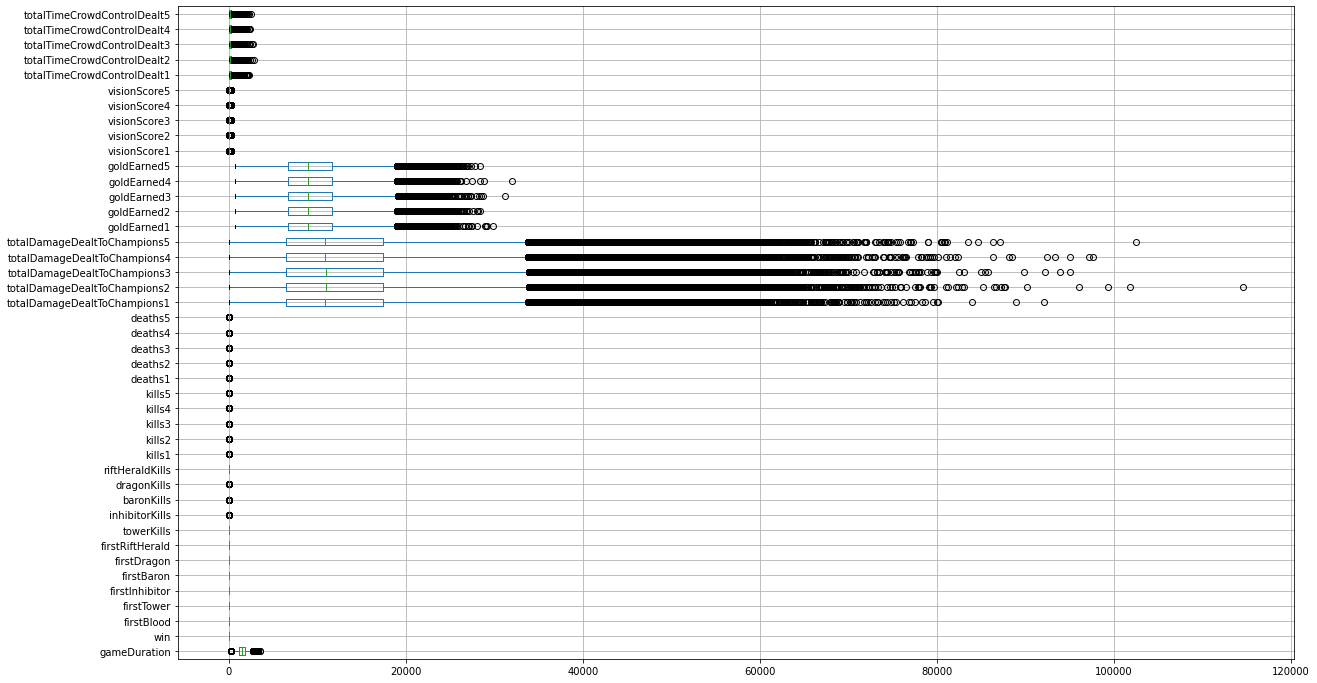

In [30]:
plt.figure(figsize=(20,12))
gameoverview.boxplot(vert=0)

데이터들이 같은 단위를 가지는 데이터에서 큰 차이가 없이 모여있는 것을 보아 아웃라이어는 없다고 판단해도 될 것 같다.

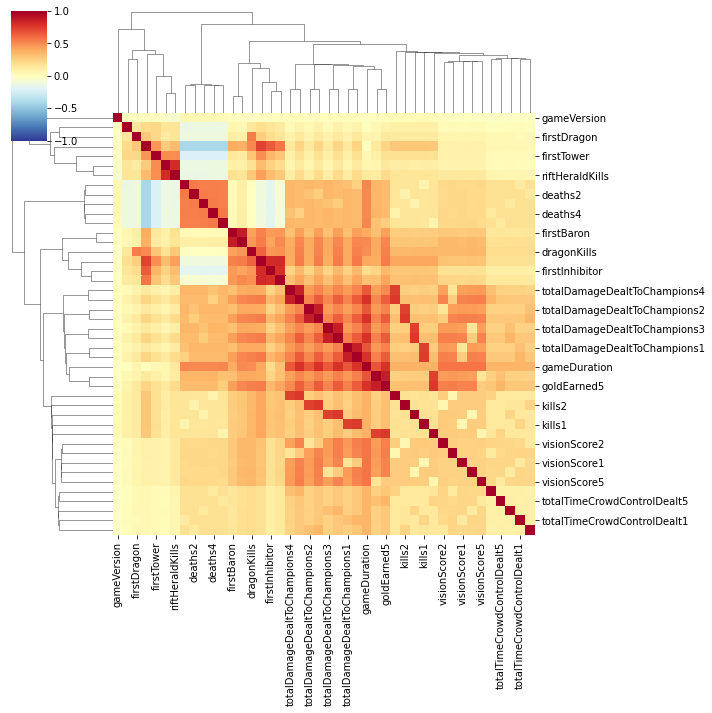

In [31]:
"""
각 변수별 상관계수 시각화
"""
corr = gamedata.corr()

sns.clustermap(corr,cmap = 'RdYlBu_r', vmin = -1, vmax = 1)

### 날짜

In [32]:
gamedata["year"] = gamedata["date"].dt.year
gamedata["month"] = gamedata["date"].dt.month
gamedata["day"] = gamedata["date"].dt.day

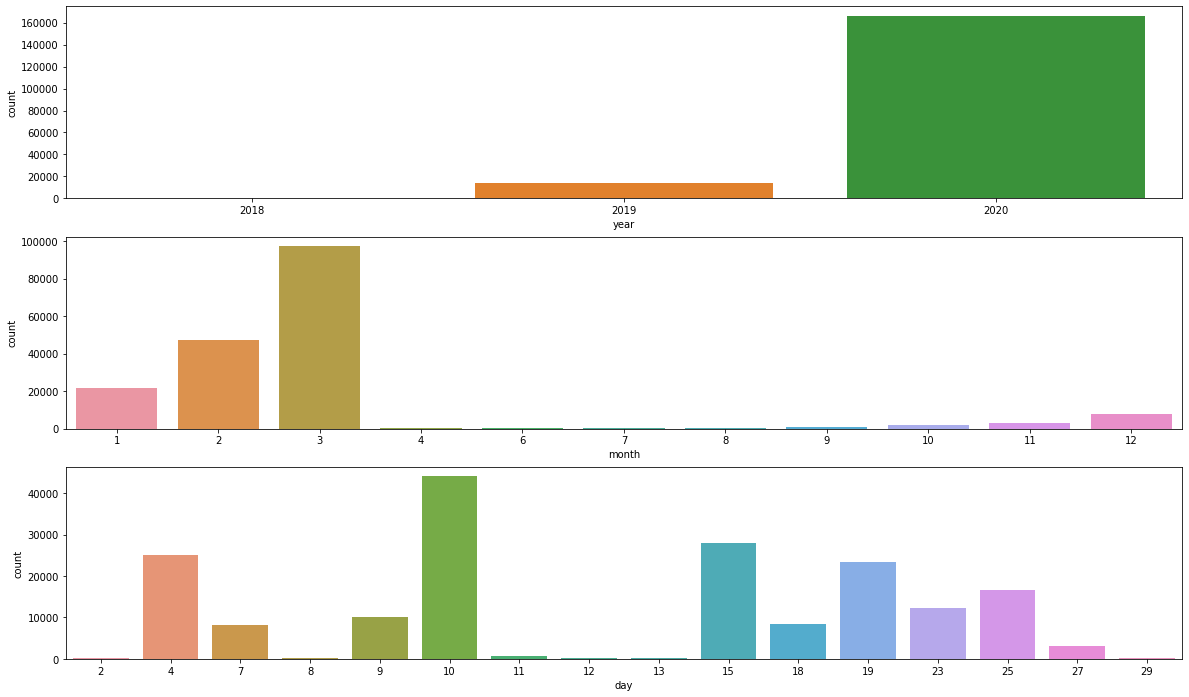

In [33]:
f,ax = plt.subplots(3,1,figsize=(20,12))
sns.countplot(gamedata["year"],ax=ax[0])
sns.countplot(gamedata["month"],ax=ax[1])
sns.countplot(gamedata["day"],ax=ax[2])

최근 3개월간을 중심으로 2020 시즌에 대한 게임이 많이 수집되었다. 또한 공식적으로 패치날짜로 명시되지 않은 날짜에 잠수함 패치가 여러번 있었다는 것을 알게되었다.

### 게임 시간 / 경기 기록

게임 진행 시간은 각 경기 기록과 상관관계가 높은 칼럼이므로 다른 칼럼과 연계하여 분석한다.

In [34]:
#gameDuration 은 게임시작시부터 끝까지 초단위로 기록되어있다. 
gamedata["gameMinute"] = gamedata["gameDuration"] / 60

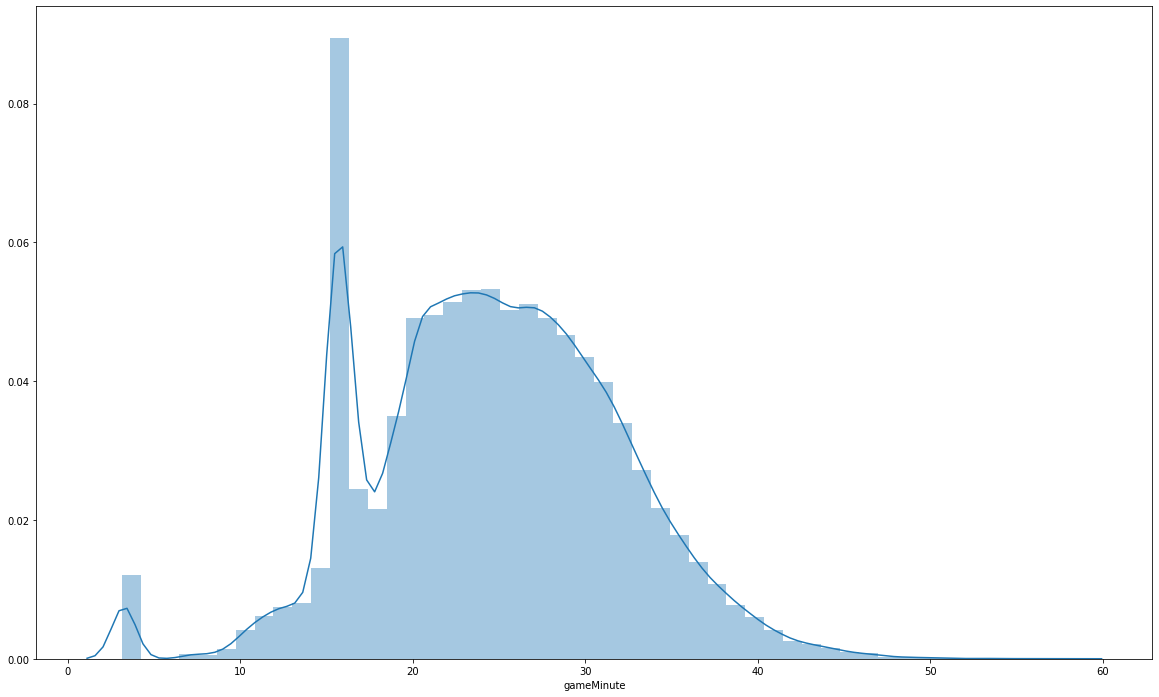

In [35]:
plt.figure(figsize=(20,12))
sns.distplot(gamedata["gameMinute"],kde=True)

게임 시간을 보니 3-4 분대의 기록이 존재한다. 3-4분대는 게임의 다시하기 기능으로, 팀원이 탈주, 에러가 발생했을 경우 투표로 5분내 게임을 무효로 종료할 수 있다.
따라서 해당 데이터는 승패 예측에 영향을 줄 수 없으므로 제거해야함.

In [36]:
gamedata = gamedata[gamedata["gameMinute"] > 5]

### 경기 시간별 구간화

게임 시간에 따른 경기 기록을 분석하기 위해 구간을 나눠서 분석하기로 결정,

다시하기 게임을 제외한 15분 이전, 15-20분, 20-25분, 25-30분, 30-35분, 35분 이후 게임 순으로 분석 

In [37]:
gamedata[(gamedata["gameMinute"] < 15)]

,gameId,gameDuration,gameVersion,teamId,win,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,towerKills,inhibitorKills,baronKills,dragonKills,riftHeraldKills,kills1,kills2,kills3,kills4,kills5,deaths1,deaths2,deaths3,deaths4,deaths5,totalDamageDealtToChampions1,totalDamageDealtToChampions2,totalDamageDealtToChampions3,totalDamageDealtToChampions4,totalDamageDealtToChampions5,goldEarned1,goldEarned2,goldEarned3,goldEarned4,goldEarned5,visionScore1,visionScore2,visionScore3,visionScore4,visionScore5,totalTimeCrowdControlDealt1,totalTimeCrowdControlDealt2,totalTimeCrowdControlDealt3,totalTimeCrowdControlDealt4,totalTimeCrowdControlDealt5,date,year,month,day,gameMinute
17,4.25594e+09,794.0,1063144405,Blue,1,0,1,1,0,1,1,6,1,0,1,1,3.0,3.0,6.0,5.0,1.0,0.0,3.0,0.0,1.0,4.0,7039.0,4698.0,4999.0,8002.0,3796.0,5744.0,6179.0,6311.0,7223.0,4244.0,2.0,7.0,15.0,7.0,13.0,46.0,36.0,132.0,141.0,20.0,2020-03-25,2020,3,25,13.233333
96,4.25529e+09,739.0,1063144405,Red,1,1,1,1,0,0,1,6,1,0,0,1,0.0,2.0,3.0,6.0,2.0,2.0,1.0,1.0,1.0,3.0,6690.0,3408.0,2762.0,6401.0,4045.0,3637.0,5274.0,5854.0,8009.0,4643.0,13.0,6.0,8.0,5.0,5.0,111.0,56.0,341.0,151.0,20.0,2020-03-25,2020,3,25,12.316667
218,4.2557e+09,695.0,1063144405,Red,1,1,1,1,0,1,1,7,1,0,1,1,4.0,7.0,1.0,4.0,1.0,0.0,0.0,0.0,2.0,0.0,4549.0,6095.0,2798.0,4621.0,3111.0,6469.0,7177.0,4779.0,5279.0,4582.0,2.0,2.0,17.0,13.0,6.0,76.0,81.0,132.0,53.0,96.0,2020-03-25,2020,3,25,11.583333
267,4.25674e+09,610.0,1063144405,Blue,1,1,1,1,0,1,1,5,1,0,1,1,4.0,5.0,5.0,2.0,3.0,1.0,2.0,1.0,0.0,0.0,4150.0,4775.0,4855.0,1850.0,3877.0,6013.0,4808.0,5301.0,4148.0,4538.0,7.0,12.0,4.0,10.0,1.0,19.0,62.0,0.0,101.0,8.0,2020-03-25,2020,3,25,10.166667
386,4.25522e+09,850.0,1063144405,Red,1,0,1,1,0,1,1,9,1,0,1,1,8.0,4.0,2.0,2.0,2.0,1.0,2.0,2.0,3.0,1.0,9636.0,6989.0,5947.0,3310.0,3703.0,8101.0,5740.0,6204.0,5008.0,6093.0,7.0,4.0,5.0,9.0,16.0,71.0,43.0,72.0,76.0,250.0,2020-03-25,2020,3,25,14.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180794,3.82267e+09,836.0,9162848446,Red,1,0,1,1,0,1,1,7,1,0,2,1,2.0,1.0,1.0,2.0,1.0,0.0,1.0,1.0,1.0,0.0,4567.0,2326.0,1541.0,5383.0,6326.0,5612.0,5589.0,4277.0,6873.0,6131.0,7.0,17.0,11.0,12.0,8.0,214.0,174.0,35.0,142.0,8.0,2019-08-10,2019,8,10,13.933333
180845,3.81161e+09,603.0,9162848446,Red,0,0,0,0,0,0,0,0,0,0,0,0,2.0,0.0,2.0,1.0,0.0,2.0,1.0,2.0,1.0,9.0,1442.0,1351.0,1042.0,3282.0,1633.0,2678.0,2092.0,2442.0,3016.0,1941.0,1.0,3.0,2.0,6.0,0.0,67.0,41.0,41.0,23.0,4.0,2019-08-10,2019,8,10,10.050000
180852,3.8242e+09,754.0,9162848446,Blue,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1.0,2.0,2.0,3.0,3.0,3.0,3.0,5.0,2157.0,1294.0,3707.0,5417.0,3870.0,2403.0,2632.0,3639.0,4140.0,4060.0,5.0,4.0,8.0,3.0,7.0,81.0,5.0,118.0,52.0,24.0,2019-08-10,2019,8,10,12.566667
180873,3.81479e+09,884.0,9162848446,Red,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,1.0,1.0,5.0,3.0,3.0,2.0,1.0,5080.0,1573.0,1253.0,1717.0,6184.0,3640.0,2601.0,3911.0,3753.0,4939.0,4.0,3.0,8.0,8.0,8.0,134.0,65.0,151.0,0.0,10.0,2019-08-10,2019,8,10,14.733333


LOL의 시스템은 다시하기를 제외하고 15분 이전의 서렌(항복)은 허용되지 않는다. 15분 이전에 넥서스(상대 기지)를 부수는 것은 매우 힘든 일이고 거의 일어나지 않는다.

하지만 약 7000개, 전체데이터의 4%가 이것이 가능한 일임을 나타낸다. 또한 이것이 각 팀의 실력이 가장 비슷하고 게임 포기가 거의 없는 챌린저, 그랜드마스터, 마스터 티어의 경기기록임을

고려하면 하위 티어(팀 간의 실력 편차가 크고 게임 포기가 잦음)에서는 15분 전 게임 종료가 더욱 빈번할 것임이 추측된다.

In [38]:
"""
해당 게임의 blue,red팀의 정보를 확인하기 위해 gameId를 라벨인코딩(조건문에서 gameId 값이 인식안됨)
"""
from sklearn.preprocessing import LabelEncoder
gamedata["gameId"] = LabelEncoder().fit_transform(gamedata["gameId"])
gamedata["gameId"].value_counts()

2047     2
17698    2
66826    2
68875    2
79116    2
        ..
70263    2
84604    2
82557    2
88702    2
0        2
Name: gameId, Length: 89269, dtype: int64

In [39]:
earlygame = gamedata[(gamedata["gameMinute"] < 15)]
earlygame

,gameId,gameDuration,gameVersion,teamId,win,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,towerKills,inhibitorKills,baronKills,dragonKills,riftHeraldKills,kills1,kills2,kills3,kills4,kills5,deaths1,deaths2,deaths3,deaths4,deaths5,totalDamageDealtToChampions1,totalDamageDealtToChampions2,totalDamageDealtToChampions3,totalDamageDealtToChampions4,totalDamageDealtToChampions5,goldEarned1,goldEarned2,goldEarned3,goldEarned4,goldEarned5,visionScore1,visionScore2,visionScore3,visionScore4,visionScore5,totalTimeCrowdControlDealt1,totalTimeCrowdControlDealt2,totalTimeCrowdControlDealt3,totalTimeCrowdControlDealt4,totalTimeCrowdControlDealt5,date,year,month,day,gameMinute
17,88419,794.0,1063144405,Blue,1,0,1,1,0,1,1,6,1,0,1,1,3.0,3.0,6.0,5.0,1.0,0.0,3.0,0.0,1.0,4.0,7039.0,4698.0,4999.0,8002.0,3796.0,5744.0,6179.0,6311.0,7223.0,4244.0,2.0,7.0,15.0,7.0,13.0,46.0,36.0,132.0,141.0,20.0,2020-03-25,2020,3,25,13.233333
96,87909,739.0,1063144405,Red,1,1,1,1,0,0,1,6,1,0,0,1,0.0,2.0,3.0,6.0,2.0,2.0,1.0,1.0,1.0,3.0,6690.0,3408.0,2762.0,6401.0,4045.0,3637.0,5274.0,5854.0,8009.0,4643.0,13.0,6.0,8.0,5.0,5.0,111.0,56.0,341.0,151.0,20.0,2020-03-25,2020,3,25,12.316667
218,88253,695.0,1063144405,Red,1,1,1,1,0,1,1,7,1,0,1,1,4.0,7.0,1.0,4.0,1.0,0.0,0.0,0.0,2.0,0.0,4549.0,6095.0,2798.0,4621.0,3111.0,6469.0,7177.0,4779.0,5279.0,4582.0,2.0,2.0,17.0,13.0,6.0,76.0,81.0,132.0,53.0,96.0,2020-03-25,2020,3,25,11.583333
267,88767,610.0,1063144405,Blue,1,1,1,1,0,1,1,5,1,0,1,1,4.0,5.0,5.0,2.0,3.0,1.0,2.0,1.0,0.0,0.0,4150.0,4775.0,4855.0,1850.0,3877.0,6013.0,4808.0,5301.0,4148.0,4538.0,7.0,12.0,4.0,10.0,1.0,19.0,62.0,0.0,101.0,8.0,2020-03-25,2020,3,25,10.166667
386,87854,850.0,1063144405,Red,1,0,1,1,0,1,1,9,1,0,1,1,8.0,4.0,2.0,2.0,2.0,1.0,2.0,2.0,3.0,1.0,9636.0,6989.0,5947.0,3310.0,3703.0,8101.0,5740.0,6204.0,5008.0,6093.0,7.0,4.0,5.0,9.0,16.0,71.0,43.0,72.0,76.0,250.0,2020-03-25,2020,3,25,14.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180794,474,836.0,9162848446,Red,1,0,1,1,0,1,1,7,1,0,2,1,2.0,1.0,1.0,2.0,1.0,0.0,1.0,1.0,1.0,0.0,4567.0,2326.0,1541.0,5383.0,6326.0,5612.0,5589.0,4277.0,6873.0,6131.0,7.0,17.0,11.0,12.0,8.0,214.0,174.0,35.0,142.0,8.0,2019-08-10,2019,8,10,13.933333
180845,406,603.0,9162848446,Red,0,0,0,0,0,0,0,0,0,0,0,0,2.0,0.0,2.0,1.0,0.0,2.0,1.0,2.0,1.0,9.0,1442.0,1351.0,1042.0,3282.0,1633.0,2678.0,2092.0,2442.0,3016.0,1941.0,1.0,3.0,2.0,6.0,0.0,67.0,41.0,41.0,23.0,4.0,2019-08-10,2019,8,10,10.050000
180852,483,754.0,9162848446,Blue,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1.0,2.0,2.0,3.0,3.0,3.0,3.0,5.0,2157.0,1294.0,3707.0,5417.0,3870.0,2403.0,2632.0,3639.0,4140.0,4060.0,5.0,4.0,8.0,3.0,7.0,81.0,5.0,118.0,52.0,24.0,2019-08-10,2019,8,10,12.566667
180873,423,884.0,9162848446,Red,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,1.0,1.0,5.0,3.0,3.0,2.0,1.0,5080.0,1573.0,1253.0,1717.0,6184.0,3640.0,2601.0,3911.0,3753.0,4939.0,4.0,3.0,8.0,8.0,8.0,134.0,65.0,151.0,0.0,10.0,2019-08-10,2019,8,10,14.733333


In [40]:
display(earlygame[earlygame["gameId"]==88419],earlygame[earlygame["gameId"]==87909],earlygame[earlygame["gameId"]==88253])

,gameId,gameDuration,gameVersion,teamId,win,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,towerKills,inhibitorKills,baronKills,dragonKills,riftHeraldKills,kills1,kills2,kills3,kills4,kills5,deaths1,deaths2,deaths3,deaths4,deaths5,totalDamageDealtToChampions1,totalDamageDealtToChampions2,totalDamageDealtToChampions3,totalDamageDealtToChampions4,totalDamageDealtToChampions5,goldEarned1,goldEarned2,goldEarned3,goldEarned4,goldEarned5,visionScore1,visionScore2,visionScore3,visionScore4,visionScore5,totalTimeCrowdControlDealt1,totalTimeCrowdControlDealt2,totalTimeCrowdControlDealt3,totalTimeCrowdControlDealt4,totalTimeCrowdControlDealt5,date,year,month,day,gameMinute
17,88419,794.0,1063144405,Blue,1,0,1,1,0,1,1,6,1,0,1,1,3.0,3.0,6.0,5.0,1.0,0.0,3.0,0.0,1.0,4.0,7039.0,4698.0,4999.0,8002.0,3796.0,5744.0,6179.0,6311.0,7223.0,4244.0,2.0,7.0,15.0,7.0,13.0,46.0,36.0,132.0,141.0,20.0,2020-03-25,2020,3,25,13.233333
8341,88419,794.0,1063144405,Red,0,1,0,0,0,0,0,0,0,0,0,0,3.0,1.0,1.0,1.0,1.0,2.0,5.0,5.0,4.0,2.0,5367.0,2155.0,3635.0,4613.0,3235.0,4400.0,3069.0,3458.0,4057.0,5062.0,6.0,9.0,6.0,6.0,13.0,12.0,48.0,6.0,37.0,239.0,2020-03-25,2020,3,25,13.233333


,gameId,gameDuration,gameVersion,teamId,win,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,towerKills,inhibitorKills,baronKills,dragonKills,riftHeraldKills,kills1,kills2,kills3,kills4,kills5,deaths1,deaths2,deaths3,deaths4,deaths5,totalDamageDealtToChampions1,totalDamageDealtToChampions2,totalDamageDealtToChampions3,totalDamageDealtToChampions4,totalDamageDealtToChampions5,goldEarned1,goldEarned2,goldEarned3,goldEarned4,goldEarned5,visionScore1,visionScore2,visionScore3,visionScore4,visionScore5,totalTimeCrowdControlDealt1,totalTimeCrowdControlDealt2,totalTimeCrowdControlDealt3,totalTimeCrowdControlDealt4,totalTimeCrowdControlDealt5,date,year,month,day,gameMinute
96,87909,739.0,1063144405,Red,1,1,1,1,0,0,1,6,1,0,0,1,0.0,2.0,3.0,6.0,2.0,2.0,1.0,1.0,1.0,3.0,6690.0,3408.0,2762.0,6401.0,4045.0,3637.0,5274.0,5854.0,8009.0,4643.0,13.0,6.0,8.0,5.0,5.0,111.0,56.0,341.0,151.0,20.0,2020-03-25,2020,3,25,12.316667
8420,87909,739.0,1063144405,Blue,0,0,0,0,0,0,0,0,0,0,0,0,3.0,2.0,0.0,2.0,1.0,4.0,3.0,1.0,1.0,4.0,3703.0,5887.0,974.0,2141.0,3618.0,3770.0,4596.0,2261.0,4085.0,3414.0,6.0,4.0,3.0,13.0,5.0,46.0,62.0,12.0,115.0,53.0,2020-03-25,2020,3,25,12.316667


,gameId,gameDuration,gameVersion,teamId,win,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,towerKills,inhibitorKills,baronKills,dragonKills,riftHeraldKills,kills1,kills2,kills3,kills4,kills5,deaths1,deaths2,deaths3,deaths4,deaths5,totalDamageDealtToChampions1,totalDamageDealtToChampions2,totalDamageDealtToChampions3,totalDamageDealtToChampions4,totalDamageDealtToChampions5,goldEarned1,goldEarned2,goldEarned3,goldEarned4,goldEarned5,visionScore1,visionScore2,visionScore3,visionScore4,visionScore5,totalTimeCrowdControlDealt1,totalTimeCrowdControlDealt2,totalTimeCrowdControlDealt3,totalTimeCrowdControlDealt4,totalTimeCrowdControlDealt5,date,year,month,day,gameMinute
218,88253,695.0,1063144405,Red,1,1,1,1,0,1,1,7,1,0,1,1,4.0,7.0,1.0,4.0,1.0,0.0,0.0,0.0,2.0,0.0,4549.0,6095.0,2798.0,4621.0,3111.0,6469.0,7177.0,4779.0,5279.0,4582.0,2.0,2.0,17.0,13.0,6.0,76.0,81.0,132.0,53.0,96.0,2020-03-25,2020,3,25,11.583333
8542,88253,695.0,1063144405,Blue,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,1.0,3.0,3.0,5.0,4.0,2.0,3352.0,2457.0,927.0,2002.0,1161.0,2998.0,2360.0,2179.0,2875.0,3166.0,3.0,2.0,4.0,3.0,2.0,58.0,4.0,18.0,46.0,60.0,2020-03-25,2020,3,25,11.583333


In [41]:
columns = gamedata.columns.tolist()

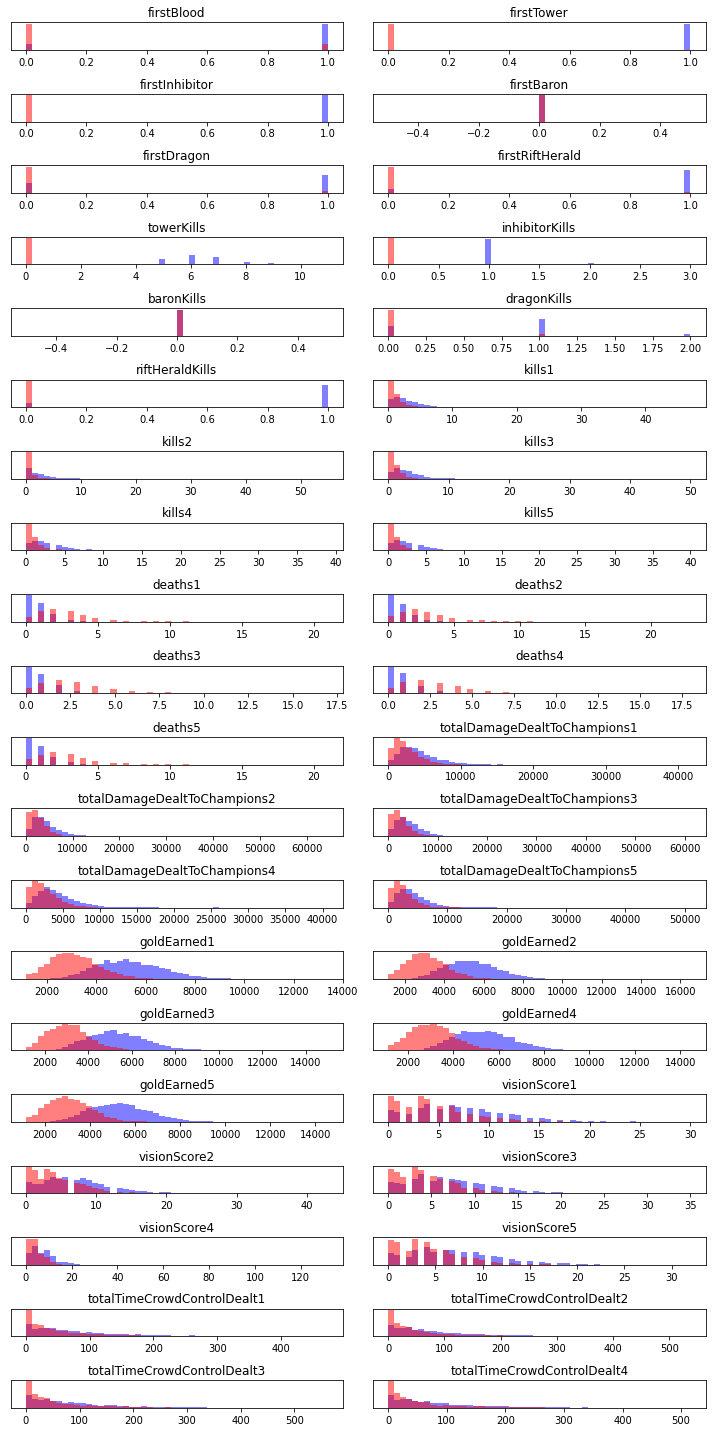

In [42]:
"""
게임 기록 win,lose 나눠서 시각화(빨강-lose, 파랑-win)
"""
f, axes = plt.subplots(20,2,figsize=(10,20))
early_win = earlygame[earlygame["win"]==1]
early_lose = earlygame[earlygame["win"]==0]

ax = axes.ravel()

for i,j in zip(range(5,45),range(0,40)):
    _,bins = np.histogram(earlygame.iloc[:,i],bins=50)
    ax[j].hist(early_win.iloc[:,i],bins=bins,color="blue",alpha=0.5)
    ax[j].hist(early_lose.iloc[:,i],bins=bins,color="red",alpha=0.5)
    ax[j].set_title(columns[i])
    ax[j].set_yticks(())
f.tight_layout()

15분 이전의 게임은 롤에서 초반, 라인전(1vs) 중심의 전개이다.

15분 이전에 끝난 게임들은, 먼저 지표들의 차이가 굉장히 극명하게 나타난다.

또한 15분내 포탑을 먼저 부수거나(firstTower), 억제기를 먼저 부수거나(firstInhibitor), 포탑을 2개 이상 부순(towerKills) 경우는 100% 확률로 승리한 것을 볼 수 있다.
이는 향후 게임의 승률을 높일때 최우선적으로 고려해야 할 사항이란 것을 알 수 있다. 

In [43]:
game15_20 = gamedata[(gamedata["gameMinute"] < 20)&(gamedata["gameMinute"]>=15)]
game15_20

,gameId,gameDuration,gameVersion,teamId,win,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,towerKills,inhibitorKills,baronKills,dragonKills,riftHeraldKills,kills1,kills2,kills3,kills4,kills5,deaths1,deaths2,deaths3,deaths4,deaths5,totalDamageDealtToChampions1,totalDamageDealtToChampions2,totalDamageDealtToChampions3,totalDamageDealtToChampions4,totalDamageDealtToChampions5,goldEarned1,goldEarned2,goldEarned3,goldEarned4,goldEarned5,visionScore1,visionScore2,visionScore3,visionScore4,visionScore5,totalTimeCrowdControlDealt1,totalTimeCrowdControlDealt2,totalTimeCrowdControlDealt3,totalTimeCrowdControlDealt4,totalTimeCrowdControlDealt5,date,year,month,day,gameMinute
3,88295,962.0,1063144405,Red,1,0,1,0,0,1,1,3,0,0,1,1,11.0,4.0,7.0,2.0,3.0,2.0,2.0,2.0,3.0,4.0,12111.0,5510.0,8440.0,5373.0,11038.0,10175.0,5552.0,7439.0,5873.0,7033.0,17.0,25.0,17.0,9.0,19.0,134.0,61.0,332.0,274.0,163.0,2020-03-25,2020,3,25,16.033333
9,86019,932.0,1063144405,Blue,1,1,1,0,0,1,1,3,0,0,2,1,4.0,2.0,2.0,6.0,4.0,3.0,0.0,1.0,0.0,1.0,6110.0,5330.0,8149.0,5209.0,9356.0,6367.0,5183.0,7468.0,6311.0,6152.0,9.0,21.0,13.0,19.0,10.0,15.0,62.0,126.0,209.0,168.0,2020-03-25,2020,3,25,15.533333
10,84747,1015.0,1063144405,Red,1,1,1,0,0,1,1,5,0,0,2,1,4.0,1.0,0.0,8.0,2.0,0.0,2.0,0.0,2.0,3.0,6450.0,5884.0,4731.0,11497.0,2793.0,6336.0,6599.0,7011.0,9216.0,4554.0,21.0,14.0,13.0,12.0,20.0,166.0,141.0,74.0,165.0,44.0,2020-03-25,2020,3,25,16.916667
13,82815,1030.0,1063144405,Blue,1,1,0,0,0,0,0,5,0,0,1,1,4.0,0.0,6.0,5.0,10.0,1.0,1.0,2.0,2.0,3.0,7322.0,2716.0,7775.0,10422.0,13562.0,8135.0,4236.0,7065.0,7934.0,9873.0,19.0,23.0,28.0,26.0,15.0,294.0,115.0,137.0,238.0,105.0,2020-03-25,2020,3,25,17.166667
20,88313,942.0,1063144405,Blue,1,0,1,0,0,0,1,1,0,0,1,1,4.0,7.0,1.0,0.0,1.0,3.0,1.0,2.0,4.0,2.0,7925.0,8981.0,3159.0,5899.0,9932.0,6537.0,8186.0,4580.0,5434.0,6358.0,8.0,17.0,28.0,21.0,13.0,168.0,235.0,30.0,92.0,100.0,2020-03-25,2020,3,25,15.700000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180900,486,1194.0,9162848446,Red,0,1,0,0,0,0,1,0,0,0,0,1,1.0,1.0,2.0,3.0,1.0,5.0,6.0,3.0,7.0,3.0,12814.0,14186.0,5298.0,4858.0,7950.0,8306.0,6333.0,5300.0,6066.0,6450.0,22.0,13.0,34.0,23.0,17.0,241.0,421.0,99.0,237.0,12.0,2019-08-10,2019,8,10,19.900000
180901,403,928.0,9162848446,Blue,0,0,0,0,0,0,0,0,0,0,0,0,0.0,5.0,1.0,0.0,1.0,5.0,6.0,4.0,3.0,3.0,5504.0,5179.0,5529.0,4693.0,3154.0,4874.0,5743.0,4772.0,5055.0,3674.0,8.0,16.0,6.0,11.0,16.0,147.0,279.0,46.0,8.0,32.0,2019-08-10,2019,8,10,15.466667
180905,487,965.0,9162848446,Red,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0.0,1.0,1.0,1.0,3.0,4.0,8.0,4.0,4.0,1172.0,3134.0,5376.0,6483.0,3994.0,2921.0,3858.0,6076.0,5057.0,5748.0,6.0,3.0,8.0,6.0,14.0,4.0,19.0,32.0,90.0,171.0,2019-08-10,2019,8,10,16.083333
180912,5,1179.0,912577563,Blue,1,1,1,1,0,1,1,11,3,0,1,1,9.0,7.0,5.0,2.0,3.0,4.0,2.0,3.0,5.0,3.0,14155.0,10456.0,7457.0,6063.0,11818.0,11504.0,11665.0,9386.0,6300.0,8800.0,18.0,23.0,22.0,37.0,13.0,56.0,83.0,677.0,72.0,409.0,2018-12-15,2018,12,15,19.650000


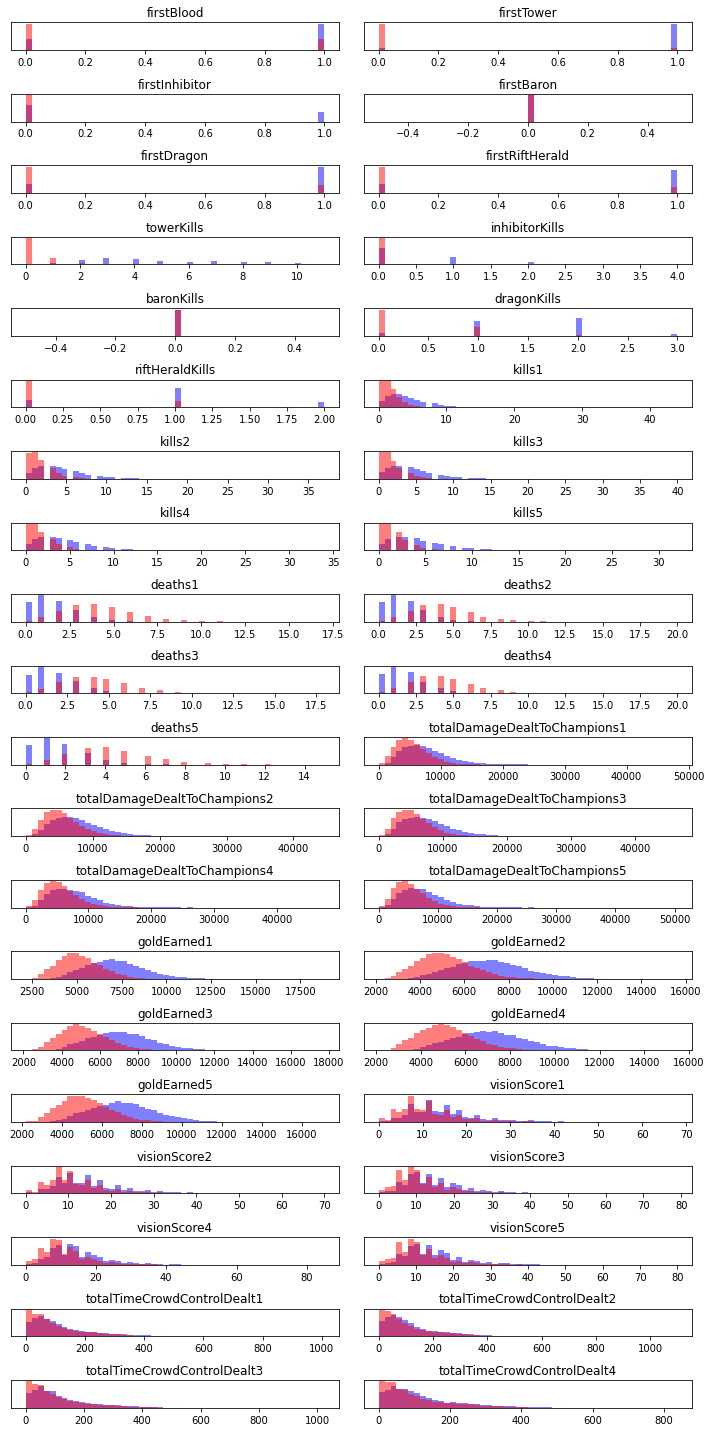

In [44]:
"""
게임 기록 win,lose 나눠서 시각화(빨강-lose, 파랑-win)
"""
f, axes = plt.subplots(20,2,figsize=(10,20))
win_15_20 = game15_20[game15_20["win"]==1]
lose_15_20 = game15_20[game15_20["win"]==0]

ax = axes.ravel()

for i,j in zip(range(5,45),range(0,40)):
    _,bins = np.histogram(game15_20.iloc[:,i],bins=50)
    ax[j].hist(win_15_20.iloc[:,i],bins=bins,color="blue",alpha=0.5)
    ax[j].hist(lose_15_20.iloc[:,i],bins=bins,color="red",alpha=0.5)
    ax[j].set_title(columns[i])
    ax[j].set_yticks(())
f.tight_layout()

롤에서 15- 20분은 초중반 대의 게임이다.

15-20분 사이의 게임은 지표들의 차이가 조금 줄어들었다. 이 시간대부터 확실하게 100% 승리를 보장하는 지표는 없다.

하지만 firstTower(최초 포탑 파괴)여부, dragonKills(용 처치 횟수) 2회 이상, death1-5(죽음 횟수) 0회가 승리할 확률이 높다고 판단할 수 있다.

In [45]:
game20_25 = gamedata[(gamedata["gameMinute"] < 25)&(gamedata["gameMinute"]>=20)]
game20_25

,gameId,gameDuration,gameVersion,teamId,win,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,towerKills,inhibitorKills,baronKills,dragonKills,riftHeraldKills,kills1,kills2,kills3,kills4,kills5,deaths1,deaths2,deaths3,deaths4,deaths5,totalDamageDealtToChampions1,totalDamageDealtToChampions2,totalDamageDealtToChampions3,totalDamageDealtToChampions4,totalDamageDealtToChampions5,goldEarned1,goldEarned2,goldEarned3,goldEarned4,goldEarned5,visionScore1,visionScore2,visionScore3,visionScore4,visionScore5,totalTimeCrowdControlDealt1,totalTimeCrowdControlDealt2,totalTimeCrowdControlDealt3,totalTimeCrowdControlDealt4,totalTimeCrowdControlDealt5,date,year,month,day,gameMinute
0,82704,1323.0,1063144405,Red,1,0,1,1,0,1,1,9,1,0,3,2,10.0,4.0,4.0,6.0,7.0,4.0,1.0,4.0,4.0,2.0,17898.0,15800.0,10786.0,16964.0,11568.0,9802.0,9203.0,11127.0,9286.0,10414.0,28.0,16.0,23.0,17.0,36.0,183.0,92.0,231.0,54.0,281.0,2020-03-25,2020,3,25,22.050000
1,82557,1317.0,1063144405,Blue,1,0,0,0,0,1,1,4,0,0,2,2,3.0,7.0,0.0,7.0,2.0,5.0,0.0,0.0,0.0,3.0,16662.0,11674.0,7498.0,13016.0,11393.0,8452.0,9069.0,6023.0,9868.0,7660.0,14.0,27.0,46.0,16.0,22.0,33.0,291.0,31.0,235.0,407.0,2020-03-25,2020,3,25,21.950000
2,88316,1244.0,1063144405,Red,1,1,1,1,0,1,0,6,1,0,3,1,7.0,3.0,5.0,9.0,4.0,5.0,1.0,2.0,1.0,2.0,16241.0,7572.0,10024.0,15115.0,12395.0,9029.0,6921.0,8331.0,11860.0,8589.0,11.0,35.0,25.0,15.0,21.0,178.0,82.0,371.0,140.0,122.0,2020-03-25,2020,3,25,20.733333
5,88139,1447.0,1063144405,Blue,1,0,1,1,1,1,1,9,2,1,2,1,7.0,1.0,11.0,10.0,8.0,3.0,0.0,3.0,6.0,5.0,14904.0,11158.0,16642.0,15187.0,21940.0,10072.0,8164.0,13784.0,10943.0,11406.0,41.0,41.0,21.0,39.0,19.0,310.0,45.0,133.0,78.0,73.0,2020-03-25,2020,3,25,24.116667
11,82868,1353.0,1063144405,Blue,1,1,1,1,0,1,1,6,1,0,3,2,3.0,9.0,4.0,6.0,2.0,3.0,4.0,4.0,3.0,3.0,5905.0,17851.0,9402.0,11282.0,6299.0,9028.0,11521.0,9690.0,9711.0,6370.0,22.0,14.0,15.0,22.0,54.0,78.0,77.0,96.0,341.0,91.0,2020-03-25,2020,3,25,22.550000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180917,1,1394.0,912577563,Blue,0,1,0,0,0,0,0,1,0,0,0,0,10.0,0.0,1.0,2.0,7.0,3.0,13.0,5.0,5.0,7.0,21288.0,5325.0,4337.0,9221.0,14004.0,13248.0,5346.0,5252.0,7408.0,9365.0,15.0,18.0,40.0,17.0,18.0,144.0,162.0,82.0,9.0,122.0,2018-12-15,2018,12,15,23.233333
180918,7,1232.0,912577563,Red,0,1,0,0,0,1,1,0,0,0,1,1,4.0,2.0,3.0,2.0,1.0,4.0,7.0,0.0,5.0,4.0,7688.0,12049.0,9404.0,3637.0,15433.0,6940.0,7238.0,8181.0,5195.0,7079.0,20.0,13.0,17.0,30.0,24.0,259.0,453.0,40.0,80.0,159.0,2018-12-15,2018,12,15,20.533333
180919,0,1469.0,912577563,Blue,0,0,0,0,0,0,0,4,0,0,0,0,4.0,2.0,3.0,1.0,4.0,3.0,8.0,5.0,10.0,5.0,13139.0,16478.0,8170.0,10141.0,8561.0,10716.0,9358.0,7500.0,8882.0,8601.0,19.0,12.0,61.0,17.0,31.0,115.0,355.0,93.0,647.0,381.0,2018-12-15,2018,12,15,24.483333
180922,4,1495.0,912577563,Blue,0,0,1,0,0,0,0,3,0,0,0,0,3.0,2.0,4.0,11.0,2.0,9.0,8.0,11.0,3.0,9.0,14796.0,5542.0,13403.0,20318.0,10181.0,9615.0,6625.0,8643.0,11812.0,8511.0,27.0,24.0,18.0,19.0,20.0,40.0,66.0,45.0,86.0,251.0,2018-12-15,2018,12,15,24.916667


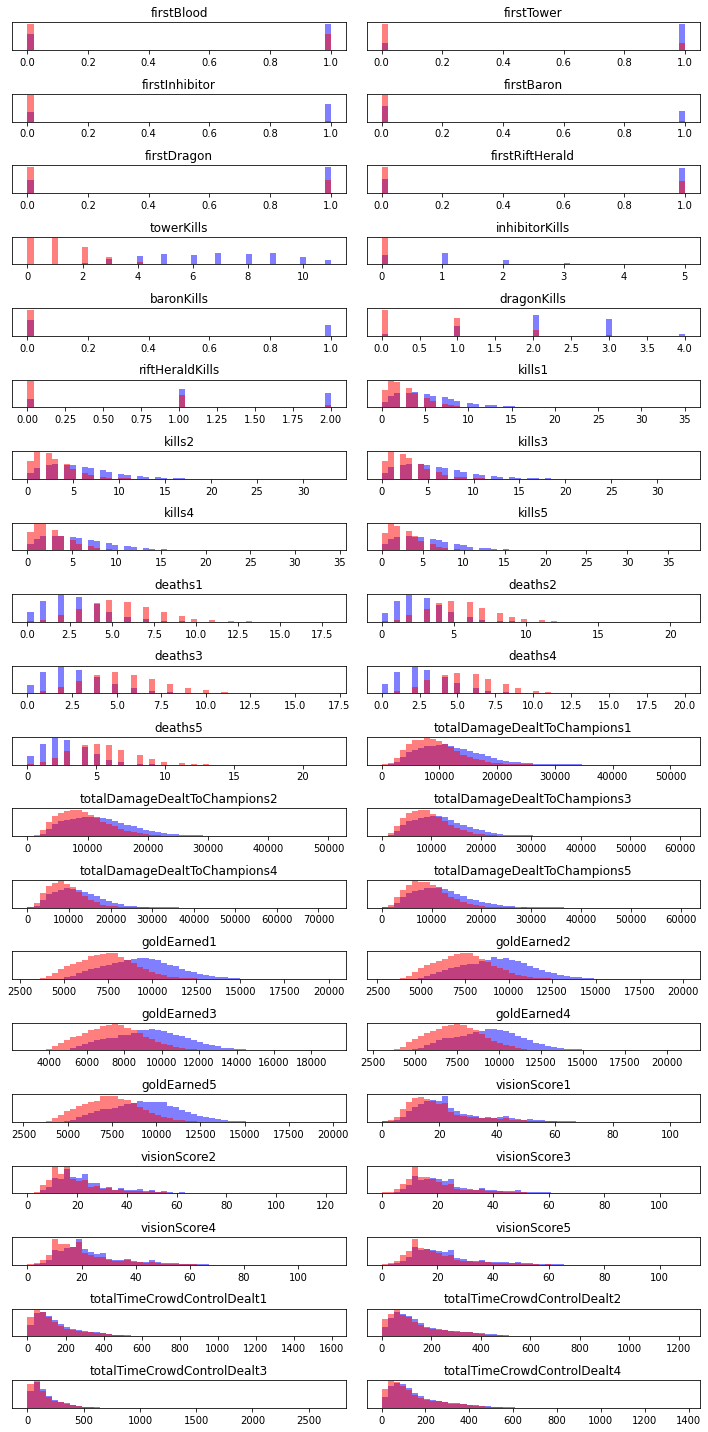

In [46]:
"""
게임 기록 win,lose 나눠서 시각화(빨강-lose, 파랑-win)
"""
f, axes = plt.subplots(20,2,figsize=(10,20))
win_20_25 = game20_25[game20_25["win"]==1]
lose_20_25 = game20_25[game20_25["win"]==0]

ax = axes.ravel()

for i,j in zip(range(5,45),range(0,40)):
    _,bins = np.histogram(game20_25.iloc[:,i],bins=50)
    ax[j].hist(win_20_25.iloc[:,i],bins=bins,color="blue",alpha=0.5)
    ax[j].hist(lose_20_25.iloc[:,i],bins=bins,color="red",alpha=0.5)
    ax[j].set_title(columns[i])
    ax[j].set_yticks(())
f.tight_layout()

롤에서 20-25분은 중간대의 게임이다.

20-25분대의 게임은 totalTimeCrowdControlDealt( 군중제어기 사용시간 ) 지표는 거의 완전히 겹쳐지기 시작했고, firstBaron, baronKills 바론(20분 후부터 등장) 처치여부의 변화가 나타나기 시작했다.

이 시간대에 중요하게 보아야할 지표는, firstinhibitor(최초 억제기 파괴), riftHeraldKills(전령처치 횟수) 2회 이상, dragonKills(용  처치횟수) 3회 이상이 승률이 높다고 판단된다.

In [47]:
game20_25.pivot_table(index="win", columns="firstBaron", aggfunc="size")

firstBaron,0,1
win,,
0,23511,283
1,14169,9625


In [48]:
또한 20-25분대에 바론을 먹으면 약 97%확률로 승리한다는 것을 알 수 있다.

SyntaxError: invalid syntax (<ipython-input-48-48b2c299953f>, line 1)

In [49]:
game25_30 = gamedata[(gamedata["gameMinute"] < 30)&(gamedata["gameMinute"]>=25)]
game25_30

,gameId,gameDuration,gameVersion,teamId,win,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,towerKills,inhibitorKills,baronKills,dragonKills,riftHeraldKills,kills1,kills2,kills3,kills4,kills5,deaths1,deaths2,deaths3,deaths4,deaths5,totalDamageDealtToChampions1,totalDamageDealtToChampions2,totalDamageDealtToChampions3,totalDamageDealtToChampions4,totalDamageDealtToChampions5,goldEarned1,goldEarned2,goldEarned3,goldEarned4,goldEarned5,visionScore1,visionScore2,visionScore3,visionScore4,visionScore5,totalTimeCrowdControlDealt1,totalTimeCrowdControlDealt2,totalTimeCrowdControlDealt3,totalTimeCrowdControlDealt4,totalTimeCrowdControlDealt5,date,year,month,day,gameMinute
4,88215,1632.0,1063144405,Red,1,1,1,1,1,0,0,9,2,1,2,0,0.0,4.0,2.0,11.0,8.0,1.0,4.0,4.0,3.0,4.0,10900.0,11362.0,14494.0,27391.0,22399.0,7217.0,10497.0,10323.0,13499.0,12720.0,42.0,38.0,30.0,18.0,26.0,69.0,503.0,562.0,79.0,69.0,2020-03-25,2020,3,25,27.200000
6,87968,1750.0,1063144405,Blue,1,1,1,1,0,1,1,9,1,0,4,2,9.0,10.0,9.0,9.0,2.0,2.0,2.0,3.0,1.0,5.0,21941.0,23084.0,29460.0,16254.0,8718.0,15416.0,13623.0,12462.0,12086.0,8331.0,19.0,46.0,25.0,31.0,86.0,168.0,291.0,102.0,444.0,92.0,2020-03-25,2020,3,25,29.166667
15,82449,1537.0,1063144405,Red,1,1,1,0,1,1,1,6,0,1,4,1,4.0,4.0,2.0,4.0,3.0,6.0,0.0,3.0,4.0,2.0,10666.0,9814.0,5445.0,9335.0,16245.0,7292.0,10079.0,9066.0,10685.0,11602.0,58.0,21.0,29.0,40.0,33.0,89.0,120.0,330.0,30.0,71.0,2020-03-25,2020,3,25,25.616667
16,88429,1663.0,1063144405,Blue,1,0,1,1,1,0,1,11,3,1,2,2,14.0,2.0,10.0,5.0,8.0,4.0,3.0,5.0,5.0,1.0,32944.0,12757.0,21004.0,19999.0,12841.0,16214.0,8148.0,12865.0,12004.0,11195.0,36.0,92.0,22.0,19.0,39.0,129.0,206.0,23.0,311.0,190.0,2020-03-25,2020,3,25,27.716667
25,86633,1698.0,1063144405,Blue,1,0,1,1,1,1,1,9,1,1,4,2,11.0,14.0,9.0,3.0,5.0,6.0,2.0,3.0,5.0,4.0,23615.0,29633.0,22108.0,21962.0,9733.0,13635.0,15341.0,13441.0,11207.0,9104.0,33.0,50.0,23.0,14.0,63.0,108.0,207.0,50.0,779.0,335.0,2020-03-25,2020,3,25,28.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180916,3,1591.0,912577563,Blue,1,1,1,1,1,1,1,9,2,1,3,1,2.0,10.0,13.0,3.0,12.0,5.0,1.0,7.0,6.0,3.0,15889.0,26082.0,26810.0,7968.0,20258.0,8780.0,12359.0,13995.0,9349.0,13430.0,21.0,11.0,15.0,61.0,21.0,60.0,207.0,276.0,100.0,819.0,2018-12-15,2018,12,15,26.516667
180920,9,1530.0,912577563,Red,0,1,0,0,0,0,0,1,0,0,1,0,1.0,5.0,4.0,5.0,1.0,4.0,8.0,8.0,4.0,5.0,8726.0,10209.0,15398.0,18005.0,11849.0,6448.0,8721.0,9308.0,10077.0,7823.0,55.0,18.0,15.0,19.0,17.0,223.0,399.0,107.0,99.0,248.0,2018-12-15,2018,12,15,25.500000
180924,8,1684.0,912577563,Blue,0,0,0,0,0,1,0,0,0,0,1,0,4.0,1.0,5.0,2.0,4.0,8.0,5.0,6.0,5.0,10.0,6319.0,14100.0,16182.0,12772.0,12664.0,7962.0,8291.0,12046.0,8564.0,8811.0,70.0,30.0,14.0,19.0,27.0,127.0,1454.0,540.0,48.0,555.0,2018-12-15,2018,12,15,28.066667
180926,6,1694.0,912577563,Red,0,1,1,0,0,1,1,4,0,0,2,1,7.0,7.0,6.0,5.0,9.0,8.0,6.0,9.0,8.0,6.0,16953.0,11149.0,22181.0,13205.0,18448.0,11375.0,11133.0,12146.0,10025.0,11755.0,28.0,23.0,22.0,72.0,25.0,296.0,285.0,822.0,139.0,657.0,2018-12-15,2018,12,15,28.233333


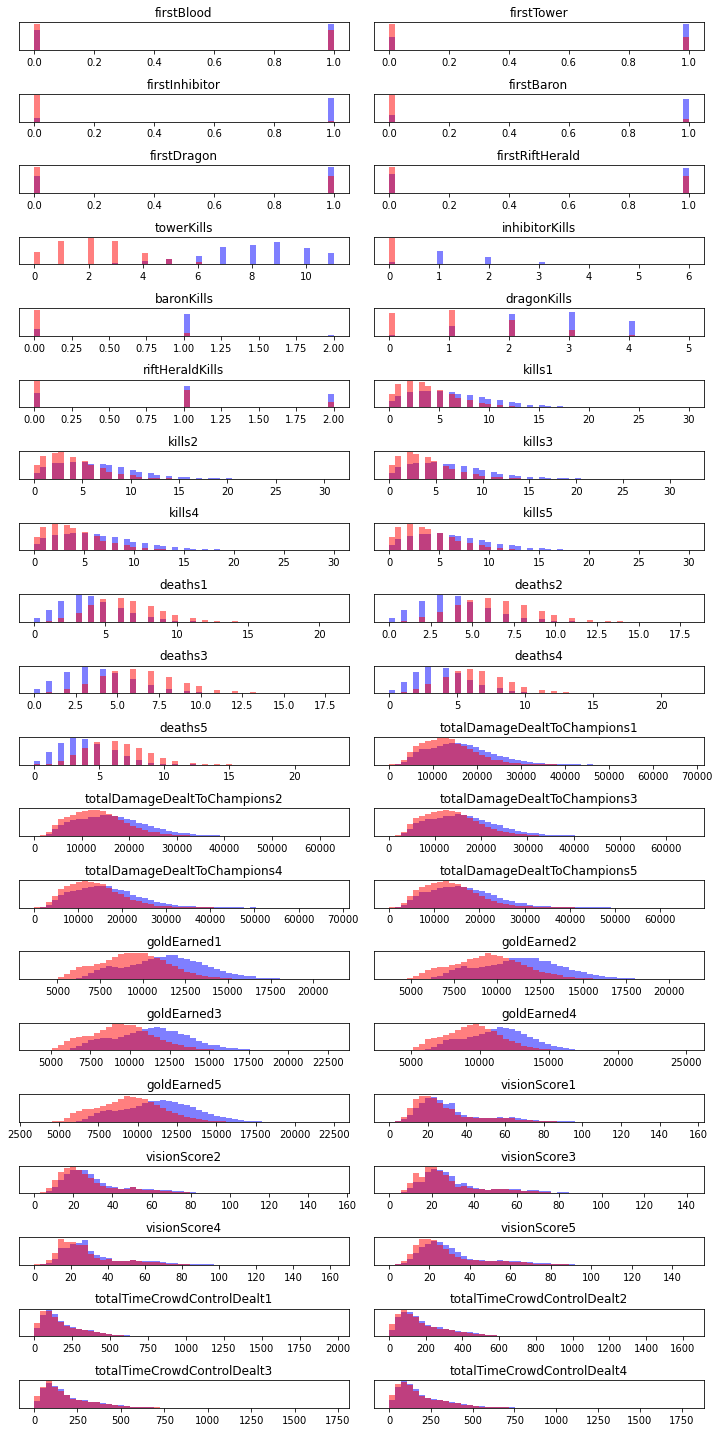

In [50]:
"""
게임 기록 win,lose 나눠서 시각화(빨강-lose, 파랑-win)
"""
f, axes = plt.subplots(20,2,figsize=(10,20))
win_25_30 = game25_30[game25_30["win"]==1]
lose_25_30 = game25_30[game25_30["win"]==0]

ax = axes.ravel()

for i,j in zip(range(5,45),range(0,40)):
    _,bins = np.histogram(game25_30.iloc[:,i],bins=50)
    ax[j].hist(win_25_30.iloc[:,i],bins=bins,color="blue",alpha=0.5)
    ax[j].hist(lose_25_30.iloc[:,i],bins=bins,color="red",alpha=0.5)
    ax[j].set_title(columns[i])
    ax[j].set_yticks(())
f.tight_layout()

25-30분대는 롤에서 중후반으로 접어든 게임이라고 한다. 

군중제어기 시간은 20-25분대에서는 이제 승리에 거의 영향이 없고 totalDamageDealt(챔피언에게 가한 피해)도 겹쳐지는 것을 봐선 딜량도 승률에 미치는 영향이 떨어져가고 있다. 

이것이 의미하는 바는, 위의 지표들이 구분되던 10-25분대는 라인전(1vs1) 중심의 싸움이 주고, 25-30분대는 한타(5vs5) 중심의 싸움이 주가 되어 개인이 팀의 승률에 미치는 영향이 많이 떨어졌다고 판단된다.

그리고, 놀라운 점은 다른 first(최초) 관련 지표는 승리에 미치는 영향이 줄어드는 반면, firstinhibitor(최초 억제기 파괴)는 25-30분 시간대에도 지표가 유지되고 있다.
이는 30분대까지 억제기를 많이 파괴할수록 다른 어떤 것보다 승리할 확률이 굉장히 높아진다는 것이다.

다른 승리에 영향을 줄 수 있는 지표는 dragonKills(드래곤 처치 횟수) 4회, death(죽음) 횟수가 적은것이다.

In [51]:
game25_30.pivot_table(index="win", columns="firstBaron", aggfunc="size")

firstBaron,0,1
win,,
0,20282,1806
1,5082,17006


또한 바론을 먹는 것도 90% 확률로 승리가 가능한 것을 볼 수 있다.

In [52]:
game30_35 = gamedata[(gamedata["gameMinute"] < 35)&(gamedata["gameMinute"]>=30)]
game30_35

,gameId,gameDuration,gameVersion,teamId,win,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,towerKills,inhibitorKills,baronKills,dragonKills,riftHeraldKills,kills1,kills2,kills3,kills4,kills5,deaths1,deaths2,deaths3,deaths4,deaths5,totalDamageDealtToChampions1,totalDamageDealtToChampions2,totalDamageDealtToChampions3,totalDamageDealtToChampions4,totalDamageDealtToChampions5,goldEarned1,goldEarned2,goldEarned3,goldEarned4,goldEarned5,visionScore1,visionScore2,visionScore3,visionScore4,visionScore5,totalTimeCrowdControlDealt1,totalTimeCrowdControlDealt2,totalTimeCrowdControlDealt3,totalTimeCrowdControlDealt4,totalTimeCrowdControlDealt5,date,year,month,day,gameMinute
7,87857,1890.0,1063144405,Blue,1,0,1,1,1,0,1,11,3,1,2,1,8.0,10.0,5.0,10.0,0.0,5.0,5.0,4.0,7.0,6.0,15767.0,36378.0,19081.0,28659.0,3773.0,15244.0,14276.0,13367.0,13421.0,8466.0,23.0,55.0,47.0,25.0,70.0,279.0,493.0,287.0,501.0,193.0,2020-03-25,2020,3,25,31.500000
8,86416,1982.0,1063144405,Red,1,1,1,1,0,1,1,8,1,1,5,1,18.0,5.0,2.0,2.0,11.0,2.0,6.0,8.0,4.0,8.0,35383.0,18697.0,19598.0,14008.0,30111.0,18701.0,12339.0,10803.0,9969.0,16504.0,72.0,50.0,29.0,80.0,22.0,365.0,119.0,456.0,215.0,300.0,2020-03-25,2020,3,25,33.033333
14,82564,1958.0,1063144405,Blue,1,1,1,1,0,1,1,9,1,0,3,2,9.0,15.0,5.0,5.0,5.0,4.0,2.0,3.0,2.0,3.0,25662.0,35759.0,23330.0,8233.0,19888.0,13158.0,17064.0,11573.0,9650.0,13453.0,35.0,21.0,81.0,78.0,33.0,85.0,139.0,499.0,112.0,74.0,2020-03-25,2020,3,25,32.633333
22,88151,1901.0,1063144405,Red,1,0,1,1,0,0,1,8,1,0,3,1,6.0,15.0,15.0,4.0,3.0,4.0,6.0,11.0,11.0,10.0,18397.0,31335.0,33651.0,5837.0,17709.0,12954.0,14872.0,18387.0,9009.0,12468.0,30.0,33.0,22.0,87.0,30.0,93.0,371.0,291.0,120.0,295.0,2020-03-25,2020,3,25,31.683333
33,83622,1923.0,1063144405,Red,1,1,1,1,0,1,1,10,3,0,4,2,2.0,16.0,6.0,7.0,3.0,7.0,5.0,2.0,4.0,4.0,13457.0,47490.0,25996.0,19720.0,13596.0,10388.0,17587.0,12453.0,14097.0,8588.0,25.0,27.0,46.0,25.0,62.0,135.0,223.0,397.0,195.0,96.0,2020-03-25,2020,3,25,32.050000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180881,465,2021.0,9162848446,Blue,0,0,0,0,0,0,1,4,0,0,2,1,11.0,4.0,9.0,11.0,0.0,3.0,9.0,11.0,10.0,11.0,20849.0,22119.0,30170.0,33962.0,12361.0,15172.0,12586.0,12809.0,14558.0,7554.0,31.0,38.0,17.0,41.0,91.0,303.0,56.0,132.0,922.0,374.0,2019-08-10,2019,8,10,33.683333
180886,444,2009.0,9162848446,Blue,0,1,0,0,0,1,0,2,0,0,1,0,1.0,6.0,1.0,12.0,4.0,9.0,10.0,11.0,4.0,9.0,11927.0,27734.0,5629.0,27526.0,13926.0,10853.0,10739.0,7654.0,17848.0,10357.0,25.0,23.0,37.0,32.0,27.0,303.0,125.0,154.0,150.0,69.0,2019-08-10,2019,8,10,33.483333
180890,445,1804.0,9162848446,Blue,0,0,1,1,0,1,0,7,1,0,2,0,5.0,7.0,9.0,1.0,11.0,3.0,8.0,9.0,9.0,12.0,17289.0,20948.0,22755.0,9520.0,31544.0,11282.0,11744.0,12452.0,9076.0,13473.0,17.0,35.0,14.0,53.0,19.0,176.0,338.0,410.0,116.0,75.0,2019-08-10,2019,8,10,30.066667
180910,10,1988.0,912577563,Blue,1,0,0,0,1,0,0,8,1,1,2,0,7.0,15.0,3.0,11.0,4.0,6.0,7.0,6.0,6.0,8.0,15831.0,31857.0,13285.0,22184.0,22603.0,14097.0,17148.0,11546.0,17924.0,14604.0,21.0,27.0,82.0,50.0,41.0,210.0,87.0,310.0,741.0,85.0,2018-12-15,2018,12,15,33.133333


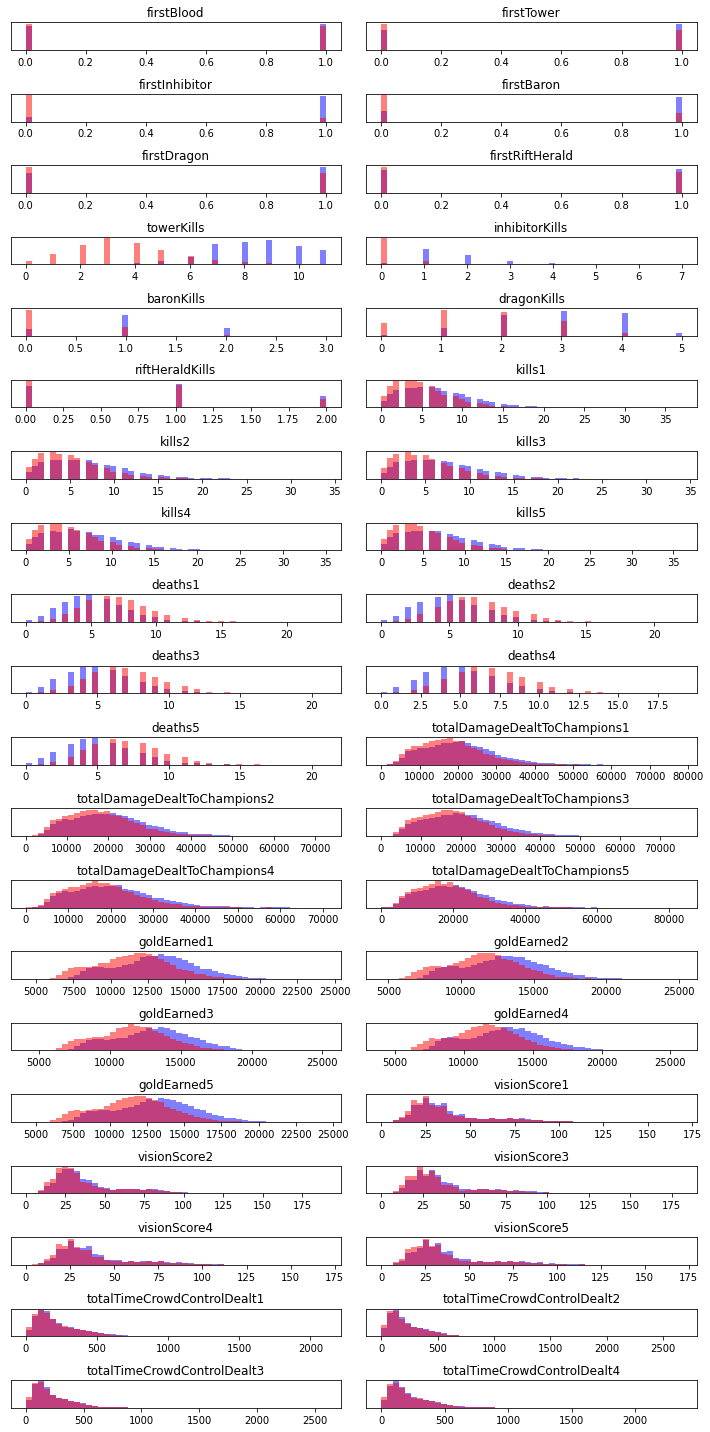

In [53]:
"""
게임 기록 win,lose 나눠서 시각화(빨강-lose, 파랑-win)
"""
f, axes = plt.subplots(20,2,figsize=(10,20))
win_30_35 = game30_35[game30_35["win"]==1]
lose_30_35 = game30_35[game30_35["win"]==0]

ax = axes.ravel()

for i,j in zip(range(5,45),range(0,40)):
    _,bins = np.histogram(game30_35.iloc[:,i],bins=50)
    ax[j].hist(win_30_35.iloc[:,i],bins=bins,color="blue",alpha=0.5)
    ax[j].hist(lose_30_35.iloc[:,i],bins=bins,color="red",alpha=0.5)
    ax[j].set_title(columns[i])
    ax[j].set_yticks(())
f.tight_layout()

30-35분 대는 후반부 게임으로 접어든 때이다. 대부분의 개인 기록들은 승패에 영향을 끼치지 못하고, goldEarnend(획득한 골드)만이 그나마 구분의 지표가 된다. 

억제기를 두개 이상 파괴하거나, 드래곤을 4번 이상 처치하거나 바론을 2번 이상 처치하는 등, 오브젝트들의 지표로 승리가 결정된다.

따라서 후반부에는 오브젝트 중심의 운영이 필요하며 개인보다 팀 위주의 싸움을 중심적으로 해야 한다.

In [54]:
late_game = gamedata[(gamedata["gameMinute"] >= 35)]
late_game

,gameId,gameDuration,gameVersion,teamId,win,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,towerKills,inhibitorKills,baronKills,dragonKills,riftHeraldKills,kills1,kills2,kills3,kills4,kills5,deaths1,deaths2,deaths3,deaths4,deaths5,totalDamageDealtToChampions1,totalDamageDealtToChampions2,totalDamageDealtToChampions3,totalDamageDealtToChampions4,totalDamageDealtToChampions5,goldEarned1,goldEarned2,goldEarned3,goldEarned4,goldEarned5,visionScore1,visionScore2,visionScore3,visionScore4,visionScore5,totalTimeCrowdControlDealt1,totalTimeCrowdControlDealt2,totalTimeCrowdControlDealt3,totalTimeCrowdControlDealt4,totalTimeCrowdControlDealt5,date,year,month,day,gameMinute
31,86208,2284.0,1063144405,Red,1,0,0,1,1,1,0,10,4,2,4,0,4.0,8.0,8.0,5.0,2.0,4.0,3.0,4.0,3.0,5.0,22382.0,31698.0,19489.0,31542.0,18296.0,14017.0,18163.0,13361.0,15722.0,10585.0,25.0,27.0,45.0,39.0,105.0,607.0,430.0,367.0,390.0,216.0,2020-03-25,2020,3,25,38.066667
38,83004,2272.0,1063144405,Blue,1,1,1,0,0,0,1,8,1,0,3,2,8.0,1.0,5.0,11.0,5.0,4.0,5.0,3.0,6.0,3.0,20702.0,14576.0,7111.0,32575.0,22860.0,17754.0,13648.0,9688.0,18445.0,13787.0,38.0,45.0,100.0,43.0,47.0,82.0,251.0,185.0,311.0,622.0,2020-03-25,2020,3,25,37.866667
60,86369,2527.0,1063144405,Blue,1,0,1,0,0,0,0,8,1,1,4,1,2.0,11.0,8.0,7.0,2.0,5.0,4.0,10.0,4.0,1.0,27058.0,53059.0,27400.0,48567.0,13302.0,12960.0,19807.0,17505.0,17604.0,10137.0,24.0,46.0,25.0,72.0,137.0,150.0,145.0,202.0,353.0,207.0,2020-03-25,2020,3,25,42.116667
61,85800,2381.0,1063144405,Red,1,1,0,0,1,0,1,9,2,2,3,1,7.0,0.0,6.0,14.0,3.0,5.0,6.0,6.0,6.0,8.0,21511.0,14610.0,34241.0,29074.0,23910.0,17028.0,10470.0,15775.0,18401.0,15008.0,35.0,101.0,17.0,44.0,37.0,455.0,187.0,218.0,520.0,245.0,2020-03-25,2020,3,25,39.683333
73,82203,2112.0,1063144405,Red,1,1,1,1,1,0,1,10,2,2,1,1,3.0,3.0,14.0,1.0,7.0,4.0,2.0,6.0,6.0,5.0,20535.0,11811.0,27895.0,10885.0,14718.0,12738.0,14669.0,19724.0,9120.0,14682.0,31.0,52.0,44.0,66.0,28.0,138.0,545.0,82.0,55.0,70.0,2020-03-25,2020,3,25,35.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180772,472,2352.0,9162848446,Blue,1,0,0,1,1,1,0,9,2,2,3,0,6.0,18.0,4.0,8.0,5.0,7.0,6.0,10.0,7.0,5.0,29817.0,59256.0,27865.0,13558.0,30417.0,18279.0,21323.0,15413.0,16440.0,17532.0,72.0,43.0,49.0,131.0,38.0,143.0,373.0,162.0,118.0,131.0,2019-08-10,2019,8,10,39.200000
180820,451,2401.0,9162848446,Red,0,0,0,1,0,0,1,7,1,0,2,1,5.0,3.0,10.0,9.0,7.0,10.0,7.0,7.0,7.0,8.0,19274.0,7172.0,35656.0,28162.0,25983.0,13733.0,10203.0,19470.0,15964.0,15077.0,43.0,98.0,33.0,38.0,39.0,535.0,97.0,155.0,340.0,216.0,2019-08-10,2019,8,10,40.016667
180823,452,2592.0,9162848446,Blue,0,1,1,0,0,1,1,4,0,0,1,1,10.0,19.0,11.0,8.0,9.0,13.0,6.0,15.0,11.0,12.0,37549.0,44576.0,33750.0,22224.0,32484.0,16086.0,19378.0,18487.0,14079.0,15989.0,39.0,35.0,24.0,86.0,55.0,631.0,72.0,0.0,105.0,287.0,2019-08-10,2019,8,10,43.200000
180843,493,2455.0,9162848446,Red,0,1,0,0,0,0,0,4,0,1,2,0,13.0,12.0,6.0,6.0,3.0,5.0,4.0,5.0,14.0,16.0,39348.0,42137.0,17116.0,24605.0,26244.0,19734.0,24856.0,11829.0,14963.0,12634.0,17.0,31.0,30.0,31.0,50.0,97.0,439.0,275.0,140.0,411.0,2019-08-10,2019,8,10,40.916667


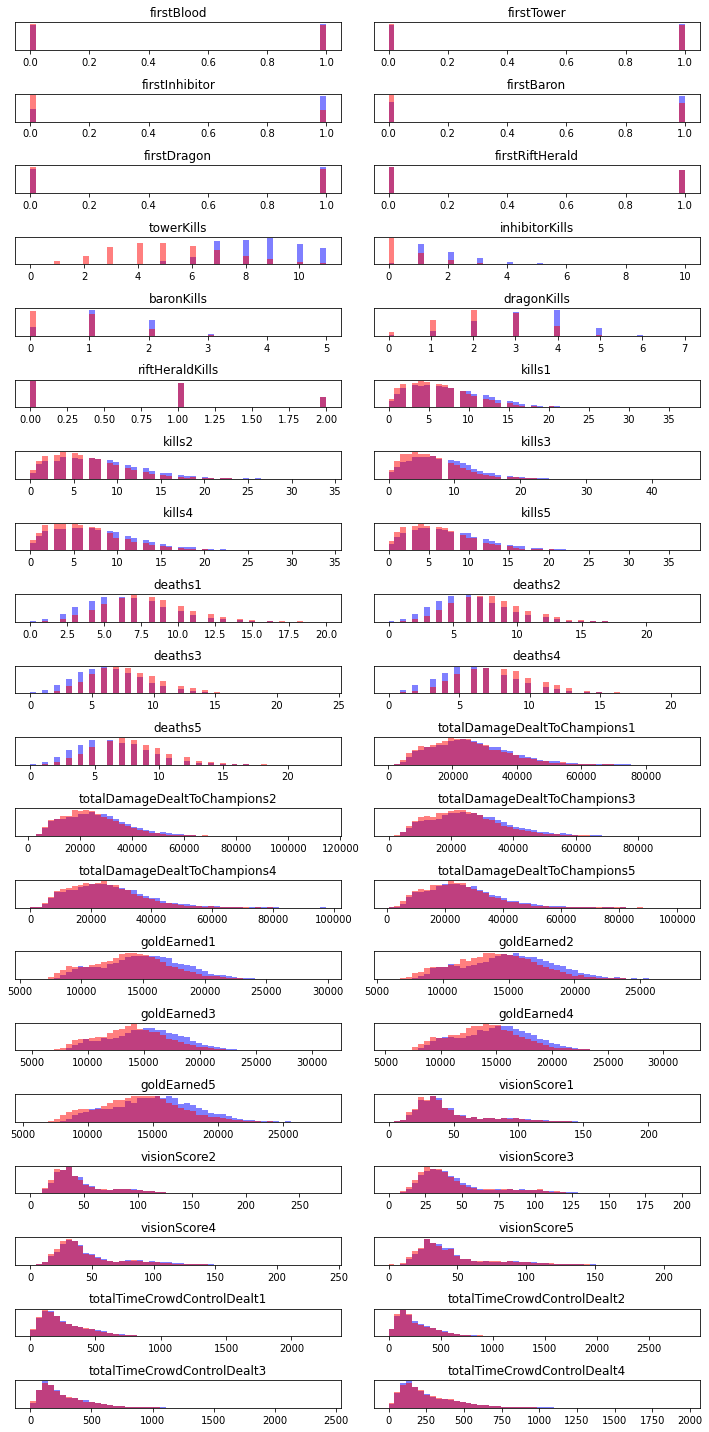

In [55]:
"""
게임 기록 win,lose 나눠서 시각화(빨강-lose, 파랑-win)
"""
f, axes = plt.subplots(20,2,figsize=(10,20))
late_win = late_game[late_game["win"]==1]
late_lose = late_game[late_game["win"]==0]

ax = axes.ravel()

for i,j in zip(range(5,45),range(0,40)):
    _,bins = np.histogram(late_game.iloc[:,i],bins=50)
    ax[j].hist(late_win.iloc[:,i],bins=bins,color="blue",alpha=0.5)
    ax[j].hist(late_lose.iloc[:,i],bins=bins,color="red",alpha=0.5)
    ax[j].set_title(columns[i])
    ax[j].set_yticks(())
f.tight_layout()

35분 이후 게임은 극후반대 게임으로 분류하는데, 거의 모든 지표가 승패를 예측할 수 없게 되었다.

이는 극후반대 게임에 진입하면 게임 기록 상의 스코어보다 외부적인, 플레이어의 컨디션에 따른 것으로 보인다. 

만약 후반부 게임을 진행할 시, 지표를 보면서 플레이하기보다, 포탑 파괴를 중점으로 운영하되 그때 상황에 맞춰서 하는 유동적인 플레이가 중요할 것으로 보인다.

## 분석 결과

리그 오브 레전드에서 초반(0-15), 초중반(15-20), 중반(20-25), 중후반(25-30), 후반(30-35), 극후반(35-inf)대 별로 중요한 지표가 완전히 달라지는 것을 볼 수 있었다.

분석 전에는 공통적으로 중요한 지표 몇가지만을 알고 있었지만, 분석을 통해 경기 시간마다 바라봐야할 지표가 완전히 다르다는 것을 알게 되었다.

이 정보들을 통해, 특성 공학에 필요한 정보를 얻었고 앞으로 진행할 모델링에 큰 도움이 될 것이다. 